In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os

In [2]:
# 자료 불러오기
csv_ls=os.listdir('datasets/')
df_dict=dict()
for file in csv_ls:
    df_dict[file.split('.')[0]]=pd.read_csv('datasets/{}'.format(file))

In [253]:
# X_data, y_data 생성
province_df=df_dict['TimeProvince']
province_confirmed=province_df.groupby(['date','province'])['confirmed'].sum().unstack()
province_released=province_df.groupby(['date','province'])['released'].sum().unstack()
province_rest=province_confirmed-province_released
province_confirmed=province_confirmed.diff(periods=1)[1:]

In [254]:
province_population=[9560112,1586797,2104381,2411618,1461848,1525303,1446830,13212180,2632262,3332290,2922556,665323,1798594,1843725,344239,9560112,1137336]
province_rest=province_rest/province_population*1000000
province_rest[1:]

province       Busan  Chungcheongbuk-do  Chungcheongnam-do      Daegu  \
date                                                                    
2020-01-21  0.000000           0.000000           0.000000   0.000000   
2020-01-22  0.000000           0.000000           0.000000   0.000000   
2020-01-23  0.000000           0.000000           0.000000   0.000000   
2020-01-24  0.000000           0.000000           0.000000   0.000000   
2020-01-25  0.000000           0.000000           0.000000   0.000000   
...              ...                ...                ...        ...   
2020-06-26  1.046013           1.260401           8.553584  86.249149   
2020-06-27  1.046013           1.890601           8.553584  84.590511   
2020-06-28  0.941412           2.520801           9.028783  84.590511   
2020-06-29  1.046013           2.520801           8.078385  85.419830   
2020-06-30  1.255215           3.151002           8.078385  85.419830   

province      Daejeon  Gangwon-do   Gwangju  Gyeonggi-do  Gyeongsangbuk-do  \
date                                                                         
2020-01-21   0.000000    0.000000  0.000000     0.000000          0.000000   
2020-01-22   0.000000    0.000000  0.000000     0.000000          0.000000   
2020-01-23   0.000000    0.000000  0.000000     0.000000          0.000000   
2020-01-24   0.000000    0.000000  0.000000     0.075688          0.000000   
2020-01-25   0.000000    0.000000  0.000000     0.075688          0.000000   
...               ...         ...       ...          ...               ...   
2020-06-26  39.675808    7.867289  0.691166    25.431080         22.794084   
2020-06-27  41.043939    7.867289  0.691166    23.387511         22.414182   
2020-06-28  45.148333    7.211682  3.455831    23.538886         22.414182   
2020-06-29  46.516464    6.556074  6.220496    23.614574         22.794084   
2020-06-30  49.936792    7.211682  8.293994    20.889815         23.173985   

province    Gyeongsangnam-do    Incheon   Jeju-do  Jeollabuk-do  Jeollanam-do  \
date                                                                            
2020-01-21          0.000000   0.342166  0.000000      0.000000      0.000000   
2020-01-22          0.000000   0.342166  0.000000      0.000000      0.000000   
2020-01-23          0.000000   0.342166  0.000000      0.000000      0.000000   
2020-01-24          0.000000   0.342166  0.000000      0.000000      0.000000   
2020-01-25          0.000000   0.342166  0.000000      0.000000      0.000000   
...                      ...        ...       ...           ...           ...   
2020-06-26          2.400751  35.927455  4.509088      2.779949      1.084760   
2020-06-27          1.500470  29.768463  4.509088      3.335939      0.542380   
2020-06-28          1.500470  24.978136  4.509088      2.779949      2.169521   
2020-06-29          1.800564  18.476977  4.509088      3.335939      2.711901   
2020-06-30          1.800564  17.450478  4.509088      3.335939      2.711901   

province      Sejong      Seoul     Ulsan  
date                                       
2020-01-21  0.000000   0.000000  0.000000  
2020-01-22  0.000000   0.000000  0.000000  
2020-01-23  0.000000   0.000000  0.000000  
2020-01-24  0.000000   0.000000  0.000000  
2020-01-25  0.000000   0.000000  0.000000  
...              ...        ...       ...  
2020-06-26  5.809917  44.350945  5.275486  
2020-06-27  5.809917  39.016279  4.396238  
2020-06-28  5.809917  39.225482  4.396238  
2020-06-29  5.809917  37.970266  4.396238  
2020-06-30  8.714875  34.204620  4.396238  

[162 rows x 17 columns]

In [255]:
province_confirmed['date']=province_confirmed.index
province_confirmed.reset_index(drop=True,inplace=True)

In [256]:
# y_data
province_confirmed

province  Busan  Chungcheongbuk-do  Chungcheongnam-do  Daegu  Daejeon  \
0           0.0                0.0                0.0    0.0      0.0   
1           0.0                0.0                0.0    0.0      0.0   
2           0.0                0.0                0.0    0.0      0.0   
3           0.0                0.0                0.0    0.0      0.0   
4           0.0                0.0                0.0    0.0      0.0   
..          ...                ...                ...    ...      ...   
157         0.0                0.0                3.0    0.0      4.0   
158         0.0                1.0                0.0    1.0      2.0   
159         0.0                1.0                1.0    0.0      6.0   
160         1.0                0.0                0.0    2.0      2.0   
161         1.0                1.0                0.0    0.0      5.0   

province  Gangwon-do  Gwangju  Gyeonggi-do  Gyeongsangbuk-do  \
0                0.0      0.0          0.0               0.0   
1                0.0      0.0          0.0               0.0   
2                0.0      0.0          0.0               0.0   
3                0.0      0.0          1.0               0.0   
4                0.0      0.0          0.0               0.0   
..               ...      ...          ...               ...   
157              1.0      0.0          4.0               1.0   
158              0.0      0.0         17.0               0.0   
159              0.0      4.0         17.0               0.0   
160              0.0      4.0         16.0               1.0   
161              1.0      3.0          7.0               1.0   

province  Gyeongsangnam-do  Incheon  Jeju-do  Jeollabuk-do  Jeollanam-do  \
0                      0.0      0.0      0.0           0.0           0.0   
1                      0.0      0.0      0.0           0.0           0.0   
2                      0.0      0.0      0.0           0.0           0.0   
3                      0.0      0.0      0.0           0.0           0.0   
4                      0.0      0.0      0.0           0.0           0.0   
..                     ...      ...      ...           ...           ...   
157                    0.0      2.0      0.0           0.0           0.0   
158                    0.0      1.0      0.0           1.0           0.0   
159                    0.0      0.0      0.0           0.0           3.0   
160                    1.0      1.0      0.0           1.0           1.0   
161                    0.0      3.0      0.0           0.0           0.0   

province  Sejong  Seoul  Ulsan        date  
0            0.0    0.0    0.0  2020-01-21  
1            0.0    0.0    0.0  2020-01-22  
2            0.0    0.0    0.0  2020-01-23  
3            0.0    0.0    0.0  2020-01-24  
4            0.0    0.0    0.0  2020-01-25  
..           ...    ...    ...         ...  
157          0.0   17.0    0.0  2020-06-26  
158          0.0   17.0    0.0  2020-06-27  
159          0.0   14.0    0.0  2020-06-28  
160          0.0    7.0    0.0  2020-06-29  
161          1.0    7.0    0.0  2020-06-30  

[162 rows x 18 columns]

In [257]:
# X_data 임포트 (상세과정 시간되면 만들기)
X_data=pd.read_csv('c:/hyuk/datasets/KR_COVID_19/X_data.csv',index_col=0)
X_data.index=X_data['date']
X_data.drop('date',axis=1,inplace=True)
X_data[X_data.columns[5:22]]=province_rest[1:]

In [258]:
X_data

SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
date                                                              
2020-01-21  0.0   0.0        0.0       0.0        0.0  0.000000   
2020-01-22  0.0   0.0        0.0       0.0        0.0  0.000000   
2020-01-23  0.0   0.0        0.0       0.0        0.0  0.000000   
2020-01-24  0.0   0.0        0.0       0.0        0.0  0.000000   
2020-01-25  0.0   0.0        0.0       0.0        0.0  0.000000   
...         ...   ...        ...       ...        ...       ...   
2020-06-26  0.3   1.0        1.0       1.0        1.0  1.046013   
2020-06-27  0.3   1.0        1.0       1.0        1.0  1.046013   
2020-06-28  0.3   1.0        1.0       1.0        1.0  0.941412   
2020-06-29  0.3   1.0        1.0       1.0        1.0  1.046013   
2020-06-30  0.3   1.0        1.0       1.0        1.0  1.255215   

            Chungcheongbuk-do  Chungcheongnam-do      Daegu    Daejeon  ...  \
date                                                                    ...   
2020-01-21           0.000000           0.000000   0.000000   0.000000  ...   
2020-01-22           0.000000           0.000000   0.000000   0.000000  ...   
2020-01-23           0.000000           0.000000   0.000000   0.000000  ...   
2020-01-24           0.000000           0.000000   0.000000   0.000000  ...   
2020-01-25           0.000000           0.000000   0.000000   0.000000  ...   
...                       ...                ...        ...        ...  ...   
2020-06-26           1.260401           8.553584  86.249149  39.675808  ...   
2020-06-27           1.890601           8.553584  84.590511  41.043939  ...   
2020-06-28           2.520801           9.028783  84.590511  45.148333  ...   
2020-06-29           2.520801           8.078385  85.419830  46.516464  ...   
2020-06-30           3.151002           8.078385  85.419830  49.936792  ...   

            Gyeonggi-do  Gyeongsangbuk-do  Gyeongsangnam-do    Incheon  \
date                                                                     
2020-01-21     0.000000          0.000000          0.000000   0.342166   
2020-01-22     0.000000          0.000000          0.000000   0.342166   
2020-01-23     0.000000          0.000000          0.000000   0.342166   
2020-01-24     0.075688          0.000000          0.000000   0.342166   
2020-01-25     0.075688          0.000000          0.000000   0.342166   
...                 ...               ...               ...        ...   
2020-06-26    25.431080         22.794084          2.400751  35.927455   
2020-06-27    23.387511         22.414182          1.500470  29.768463   
2020-06-28    23.538886         22.414182          1.500470  24.978136   
2020-06-29    23.614574         22.794084          1.800564  18.476977   
2020-06-30    20.889815         23.173985          1.800564  17.450478   

             Jeju-do  Jeollabuk-do  Jeollanam-do    Sejong      Seoul  \
date                                                                    
2020-01-21  0.000000      0.000000      0.000000  0.000000   0.000000   
2020-01-22  0.000000      0.000000      0.000000  0.000000   0.000000   
2020-01-23  0.000000      0.000000      0.000000  0.000000   0.000000   
2020-01-24  0.000000      0.000000      0.000000  0.000000   0.000000   
2020-01-25  0.000000      0.000000      0.000000  0.000000   0.000000   
...              ...           ...           ...       ...        ...   
2020-06-26  4.509088      2.779949      1.084760  5.809917  44.350945   
2020-06-27  4.509088      3.335939      0.542380  5.809917  39.016279   
2020-06-28  4.509088      2.779949      2.169521  5.809917  39.225482   
2020-06-29  4.509088      3.335939      2.711901  5.809917  37.970266   
2020-06-30  4.509088      3.335939      2.711901  8.714875  34.204620   

               Ulsan  
date                  
2020-01-21  0.000000  
2020-01-22  0.000000  
2020-01-23  0.000000  
2020-01-24  0.000000  
2020-01-25  0.000000  
...              ...  
2020-06-26  5.27

In [259]:
X_data.drop('Shutdown',axis=1,inplace=True)
X_data['Shutdown(karaoke)']=0
X_data['Shutdown(bar_and_club)']=0
X_data['Shutdown(karaoke)'][121:134]=1
X_data['Shutdown(karaoke)'][128:138]=1
X_data['TransMask']=0
X_data['TransMask'][127:]=1

C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [260]:
# contact_number 테이블 만들기
patientinfo_df=df_dict['PatientInfo']
patientinfo_df['contact_number']=patientinfo_df['contact_number'].replace('-',0)
patientinfo_df['contact_number']=patientinfo_df['contact_number'].astype(float)

In [261]:
# 이상값 존재
patientinfo_df[patientinfo_df['contact_number']>6.1000001e+08]

patient_id     sex  age country          province          city  \
818   1000000819     NaN  NaN   Korea             Seoul  Eunpyeong-gu   
5109  6100000097  female  60s   Korea  Gyeongsangnam-do      Jinju-si   
5110  6100000098    male  60s   Korea  Gyeongsangnam-do      Jinju-si   

     infection_case infected_by  contact_number symptom_onset_date  \
818             NaN         NaN    1.000001e+09                NaN   
5109            etc         NaN    6.100000e+09         2020-03-26   
5110            etc  6100000097    6.100000e+09         2020-03-28   

     confirmed_date released_date deceased_date     state  
818      2020-05-27           NaN           NaN  released  
5109     2020-03-31           NaN           NaN  released  
5110     2020-03-31           NaN           NaN  released

In [262]:
patientinfo_df.drop([818,5109,5110],inplace=True)

In [263]:
contact_df=patientinfo_df.groupby(['confirmed_date','province'])['contact_number'].sum()
contact_df=contact_df.unstack().fillna(0)

In [264]:
contact_df.index.name='date'

In [202]:
contact_df

province    Busan  Chungcheongbuk-do  Chungcheongnam-do  Daegu  Daejeon  \
date                                                                      
2020-01-20    0.0                0.0                0.0    0.0      0.0   
2020-01-23    0.0                0.0                0.0    0.0      0.0   
2020-01-26    0.0                0.0                0.0    0.0      0.0   
2020-01-27    0.0                0.0                0.0    0.0      0.0   
2020-01-30    0.0                0.0                0.0    0.0      0.0   
...           ...                ...                ...    ...      ...   
2020-06-26    0.0                0.0                0.0    0.0     16.0   
2020-06-27    0.0                0.0                0.0    0.0     76.0   
2020-06-28    0.0                0.0                0.0    0.0     46.0   
2020-06-29    0.0                0.0                0.0    0.0     10.0   
2020-06-30    0.0                0.0                1.0    0.0      5.0   

province    Gangwon-do  Gwangju  Gyeonggi-do  Gyeongsangbuk-do  \
date                                                             
2020-01-20         0.0      0.0          0.0               0.0   
2020-01-23         0.0      0.0          0.0               0.0   
2020-01-26         0.0      0.0         16.0               0.0   
2020-01-27         0.0      0.0         95.0               0.0   
2020-01-30         0.0      0.0          0.0               0.0   
...                ...      ...          ...               ...   
2020-06-26         0.0      0.0          0.0               0.0   
2020-06-27         0.0      0.0          0.0               0.0   
2020-06-28         0.0      0.0          0.0               0.0   
2020-06-29         0.0      0.0          0.0               0.0   
2020-06-30         0.0      0.0          0.0               0.0   

province    Gyeongsangnam-do  Incheon  Jeju-do  Jeollabuk-do  Jeollanam-do  \
date                                                                         
2020-01-20               0.0      0.0      0.0           0.0           0.0   
2020-01-23               0.0      0.0      0.0           0.0           0.0   
2020-01-26               0.0      0.0      0.0           0.0           0.0   
2020-01-27               0.0      0.0      0.0           0.0           0.0   
2020-01-30               0.0      0.0      0.0         113.0           0.0   
...                      ...      ...      ...           ...           ...   
2020-06-26               0.0      0.0      0.0           0.0           0.0   
2020-06-27               0.0      0.0      0.0           0.0           9.0   
2020-06-28               0.0      0.0      0.0          34.0           4.0   
2020-06-29               0.0      0.0      0.0           0.0           0.0   
2020-06-30               0.0      0.0      0.0           0.0           0.0   

province    Sejong  Seoul  Ulsan  
date                              
2020-01-20     0.0    0.0    0.0  
2020-01-23     0.0   75.0    0.0  
2020-01-26     0.0    0.0    0.0  
2020-01-27     0.0    0.0    0.0  
2020-01-30     0.0   57.0    0.0  
...            ...    ...    ...  
2020-06-26     0.0    0.0    0.0  
2020-06-27     0.0    0.0    0.0  
2020-06-28     0.0    0.0    0.0  
2020-06-29     0.0    0.0    0.0  
2020-06-30     0.0    0.0    0.0  

[148 rows x 17 columns]

In [265]:
X_data=pd.merge(left=X_data,right=contact_df,on='date',how='outer',suffixes=['_rest_rate','_contact_num']).fillna(0).drop('2020-01-20')

In [221]:
X_data

SD  Mask  TransMask  Quaratine  Busan_rest_rate  \
date                                                           
2020-01-21  0.0   0.0        0.0        0.0         0.000000   
2020-01-22  0.0   0.0        0.0        0.0         0.000000   
2020-01-23  0.0   0.0        0.0        0.0         0.000000   
2020-01-24  0.0   0.0        0.0        0.0         0.000000   
2020-01-25  0.0   0.0        0.0        0.0         0.000000   
...         ...   ...        ...        ...              ...   
2020-06-26  0.3   1.0        1.0        1.0         0.000105   
2020-06-27  0.3   1.0        1.0        1.0         0.000105   
2020-06-28  0.3   1.0        1.0        1.0         0.000094   
2020-06-29  0.3   1.0        1.0        1.0         0.000105   
2020-06-30  0.3   1.0        1.0        1.0         0.000126   

            Chungcheongbuk-do_rest_rate  Chungcheongnam-do_rest_rate  \
date                                                                   
2020-01-21                     0.000000                     0.000000   
2020-01-22                     0.000000                     0.000000   
2020-01-23                     0.000000                     0.000000   
2020-01-24                     0.000000                     0.000000   
2020-01-25                     0.000000                     0.000000   
...                                 ...                          ...   
2020-06-26                     0.000126                     0.000855   
2020-06-27                     0.000189                     0.000855   
2020-06-28                     0.000252                     0.000903   
2020-06-29                     0.000252                     0.000808   
2020-06-30                     0.000315                     0.000808   

            Daegu_rest_rate  Daejeon_rest_rate  Gangwon-do_rest_rate  ...  \
date                                                                  ...   
2020-01-21         0.000000           0.000000              0.000000  ...   
2020-01-22         0.000000           0.000000              0.000000  ...   
2020-01-23         0.000000           0.000000              0.000000  ...   
2020-01-24         0.000000           0.000000              0.000000  ...   
2020-01-25         0.000000           0.000000              0.000000  ...   
...                     ...                ...                   ...  ...   
2020-06-26         0.008625           0.003968              0.000787  ...   
2020-06-27         0.008459           0.004104              0.000787  ...   
2020-06-28         0.008459           0.004515              0.000721  ...   
2020-06-29         0.008542           0.004652              0.000656  ...   
2020-06-30         0.008542           0.004994              0.000721  ...   

            Gyeonggi-do  Gyeongsangbuk-do  Gyeongsangnam-do  Incheon  Jeju-do  \
date                                                                            
2020-01-21          0.0               0.0               0.0      0.0      0.0   
2020-01-22          0.0               0.0               0.0      0.0      0.0   
2020-01-23          0.0               0.0               0.0      0.0      0.0   
2020-01-24          0.0               0.0               0.0      0.0      0.0   
2020-01-25          0.0               0.0               0.0      0.0      0.0   
...                 ...               ...               ...      ...      ...   
2020-06-26          0.0               0.0               0.0      0.0      0.0   
2020-06-27          0.0               0.0               0.0      0.0      0.0   
2020-06-28          0.0               0.0               0.0      0.0      0.0   
2020-06-29          0.0               0.0               0.0      0.0      0.0   
2020-06-30          0.0               0.0               0.0      0.0      0.0   

            Jeollabuk-do  Jeollanam-do  Sejong  Seoul  Ulsan  
date                                                          
2020-01-21           0.0           0.0     0.0    0.0    0.0 

In [266]:
# 컬럼 분류
rest_rate=X_data.columns[4:21]
contact_number=X_data.columns[23:]

In [267]:
# 지역 리스트
regions=contact_df.columns

In [268]:
# 지역별 X_data 분류
X_dict=dict()
for i in range(len(rest_rate)):
    X_dict[regions[i]]=X_data[[rest_rate[i],contact_number[i],'SD','Mask','TransMask','Quaratine','Shutdown(karaoke)','Shutdown(bar_and_club)']]

In [269]:
X_dict['Busan']

Busan_rest_rate  Busan_contact_num   SD  Mask  TransMask  \
date                                                                   
2020-01-21         0.000000                0.0  0.0   0.0        0.0   
2020-01-22         0.000000                0.0  0.0   0.0        0.0   
2020-01-23         0.000000                0.0  0.0   0.0        0.0   
2020-01-24         0.000000                0.0  0.0   0.0        0.0   
2020-01-25         0.000000                0.0  0.0   0.0        0.0   
...                     ...                ...  ...   ...        ...   
2020-06-26         1.046013                0.0  0.3   1.0        1.0   
2020-06-27         1.046013                0.0  0.3   1.0        1.0   
2020-06-28         0.941412                0.0  0.3   1.0        1.0   
2020-06-29         1.046013                0.0  0.3   1.0        1.0   
2020-06-30         1.255215                0.0  0.3   1.0        1.0   

            Quaratine  Shutdown(karaoke)  Shutdown(bar_and_club)  
date                                                              
2020-01-21        0.0                0.0                     0.0  
2020-01-22        0.0                0.0                     0.0  
2020-01-23        0.0                0.0                     0.0  
2020-01-24        0.0                0.0                     0.0  
2020-01-25        0.0                0.0                     0.0  
...               ...                ...                     ...  
2020-06-26        1.0                0.0                     0.0  
2020-06-27        1.0                0.0                     0.0  
2020-06-28        1.0                0.0                     0.0  
2020-06-29        1.0                0.0                     0.0  
2020-06-30        1.0                0.0                     0.0  

[162 rows x 8 columns]

In [270]:
province_confirmed['date']=province_confirmed.index
province_confirmed.reset_index(drop=True,inplace=True)

In [218]:
X_data

SD  Mask  TransMask  Quaratine  Busan_rest_rate  \
date                                                           
2020-01-21  0.0   0.0        0.0        0.0         0.000000   
2020-01-22  0.0   0.0        0.0        0.0         0.000000   
2020-01-23  0.0   0.0        0.0        0.0         0.000000   
2020-01-24  0.0   0.0        0.0        0.0         0.000000   
2020-01-25  0.0   0.0        0.0        0.0         0.000000   
...         ...   ...        ...        ...              ...   
2020-06-27  0.3   1.0        1.0        1.0         0.000105   
2020-06-28  0.3   1.0        1.0        1.0         0.000094   
2020-06-29  0.3   1.0        1.0        1.0         0.000105   
2020-06-30  0.3   1.0        1.0        1.0         0.000126   
2020-01-20  0.0   0.0        0.0        0.0         0.000000   

            Chungcheongbuk-do_rest_rate  Chungcheongnam-do_rest_rate  \
date                                                                   
2020-01-21                     0.000000                     0.000000   
2020-01-22                     0.000000                     0.000000   
2020-01-23                     0.000000                     0.000000   
2020-01-24                     0.000000                     0.000000   
2020-01-25                     0.000000                     0.000000   
...                                 ...                          ...   
2020-06-27                     0.000189                     0.000855   
2020-06-28                     0.000252                     0.000903   
2020-06-29                     0.000252                     0.000808   
2020-06-30                     0.000315                     0.000808   
2020-01-20                     0.000000                     0.000000   

            Daegu_rest_rate  Daejeon_rest_rate  Gangwon-do_rest_rate  ...  \
date                                                                  ...   
2020-01-21         0.000000           0.000000              0.000000  ...   
2020-01-22         0.000000           0.000000              0.000000  ...   
2020-01-23         0.000000           0.000000              0.000000  ...   
2020-01-24         0.000000           0.000000              0.000000  ...   
2020-01-25         0.000000           0.000000              0.000000  ...   
...                     ...                ...                   ...  ...   
2020-06-27         0.008459           0.004104              0.000787  ...   
2020-06-28         0.008459           0.004515              0.000721  ...   
2020-06-29         0.008542           0.004652              0.000656  ...   
2020-06-30         0.008542           0.004994              0.000721  ...   
2020-01-20         0.000000           0.000000              0.000000  ...   

            Gyeonggi-do_contact_num  Gyeongsangbuk-do_contact_num  \
date                                                                
2020-01-21                      0.0                           0.0   
2020-01-22                      0.0                           0.0   
2020-01-23                      0.0                           0.0   
2020-01-24                      0.0                           0.0   
2020-01-25                      0.0                           0.0   
...                             ...                           ...   
2020-06-27                      0.0                           0.0   
2020-06-28                      0.0                           0.0   
2020-06-29                      0.0                           0.0   
2020-06-30                      0.0                           0.0   
2020-01-20                      0.0                           0.0   

            Gyeongsangnam-do_contact_num  Incheon_contact_num  \
date                                                            
2020-01-21                           0.0                  0.0   
2020-01-22                           0.0                  0.0   
2020-01-23                           0.0                  0.0   
2020-01-24        

In [219]:
province_confirmed

province  Busan  Chungcheongbuk-do  Chungcheongnam-do  Daegu  Daejeon  \
0           0.0                0.0                0.0    0.0      0.0   
1           0.0                0.0                0.0    0.0      0.0   
2           0.0                0.0                0.0    0.0      0.0   
3           0.0                0.0                0.0    0.0      0.0   
4           0.0                0.0                0.0    0.0      0.0   
..          ...                ...                ...    ...      ...   
157         0.0                0.0                3.0    0.0      4.0   
158         0.0                1.0                0.0    1.0      2.0   
159         0.0                1.0                1.0    0.0      6.0   
160         1.0                0.0                0.0    2.0      2.0   
161         1.0                1.0                0.0    0.0      5.0   

province  Gangwon-do  Gwangju  Gyeonggi-do  Gyeongsangbuk-do  \
0                0.0      0.0          0.0               0.0   
1                0.0      0.0          0.0               0.0   
2                0.0      0.0          0.0               0.0   
3                0.0      0.0          1.0               0.0   
4                0.0      0.0          0.0               0.0   
..               ...      ...          ...               ...   
157              1.0      0.0          4.0               1.0   
158              0.0      0.0         17.0               0.0   
159              0.0      4.0         17.0               0.0   
160              0.0      4.0         16.0               1.0   
161              1.0      3.0          7.0               1.0   

province  Gyeongsangnam-do  Incheon  Jeju-do  Jeollabuk-do  Jeollanam-do  \
0                      0.0      0.0      0.0           0.0           0.0   
1                      0.0      0.0      0.0           0.0           0.0   
2                      0.0      0.0      0.0           0.0           0.0   
3                      0.0      0.0      0.0           0.0           0.0   
4                      0.0      0.0      0.0           0.0           0.0   
..                     ...      ...      ...           ...           ...   
157                    0.0      2.0      0.0           0.0           0.0   
158                    0.0      1.0      0.0           1.0           0.0   
159                    0.0      0.0      0.0           0.0           3.0   
160                    1.0      1.0      0.0           1.0           1.0   
161                    0.0      3.0      0.0           0.0           0.0   

province  Sejong  Seoul  Ulsan        date  
0            0.0    0.0    0.0  2020-01-21  
1            0.0    0.0    0.0  2020-01-22  
2            0.0    0.0    0.0  2020-01-23  
3            0.0    0.0    0.0  2020-01-24  
4            0.0    0.0    0.0  2020-01-25  
..           ...    ...    ...         ...  
157          0.0   17.0    0.0  2020-06-26  
158          0.0   17.0    0.0  2020-06-27  
159          0.0   14.0    0.0  2020-06-28  
160          0.0    7.0    0.0  2020-06-29  
161          1.0    7.0    0.0  2020-06-30  

[162 rows x 18 columns]

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
from sklearn.metrics import mean_squared_error

In [271]:
# 전체 데이터 합산 train_test_data split
X_train=X_dict['Busan'][:112].values
for reg in regions[1:]:
    X_train=np.concatenate([X_train,X_dict[reg][:112].values])
    
X_test=X_dict['Busan'][112:-5].values
for reg in regions[1:]:
    X_test=np.concatenate([X_test,X_dict[reg][112:-5].values])
    
y_train=province_confirmed['Busan'][5:117].values
for reg in regions[1:]:
    y_train=np.concatenate([y_train,province_confirmed[reg][5:117].values])
    
y_test=province_confirmed['Busan'][117:].values
for reg in regions[1:]:
    y_test=np.concatenate([y_test,province_confirmed[reg][117:].values])

In [ ]:
# 선형회귀 파라미터 조정

In [272]:
from sklearn.preprocessing import PolynomialFeatures
degrees=[1,2,3,4,5]
for i in degrees:
    for j in degrees:
        pf1=PolynomialFeatures(degree=i,include_bias=False)
        pf2=PolynomialFeatures(degree=j,include_bias=False)
        polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
        polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
        polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
        polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])
        
        # train, test
        polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
        polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
        
        # model fitting
        lr=LinearRegression()
        lr.fit(polynominal_X_train,y_train)
        
        # estimation
        y_pred=lr.predict(polynominal_X_test)
        print('rest_rate :',i,'contact_num :',j,'score :',mean_squared_error(y_pred,y_test))

rest_rate : 1 contact_num : 1 score : 22.16161938304175
rest_rate : 1 contact_num : 2 score : 22.236985704816615
rest_rate : 1 contact_num : 3 score : 22.132837562665976
rest_rate : 1 contact_num : 4 score : 22.128920426737245
rest_rate : 1 contact_num : 5 score : 22.130681422870406
rest_rate : 2 contact_num : 1 score : 40.63238231176928
rest_rate : 2 contact_num : 2 score : 40.77994575003959
rest_rate : 2 contact_num : 3 score : 40.49788269177817
rest_rate : 2 contact_num : 4 score : 40.2775977245127
rest_rate : 2 contact_num : 5 score : 40.386833524227164
rest_rate : 3 contact_num : 1 score : 42.275155753213305
rest_rate : 3 contact_num : 2 score : 42.43215278437442
rest_rate : 3 contact_num : 3 score : 42.12767385335479
rest_rate : 3 contact_num : 4 score : 41.87663509980133
rest_rate : 3 contact_num : 5 score : 41.995578352556045
rest_rate : 4 contact_num : 1 score : 47.10722244271355
rest_rate : 4 contact_num : 2 score : 47.296738990852774
rest_rate : 4 contact_num : 3 score : 46.

In [273]:
# Ridge 회귀
from sklearn.linear_model import Ridge
degrees=[1,2,3,4,5]
for i in degrees:
    for j in degrees:
        pf1=PolynomialFeatures(degree=i,include_bias=False)
        pf2=PolynomialFeatures(degree=j,include_bias=False)
        polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
        polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
        polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
        polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])
        
        # train, test
        polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
        polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
        
        # model fitting
        ridge=Ridge()
        ridge.fit(polynominal_X_train,y_train)
        
        # estimation
        y_pred=ridge.predict(polynominal_X_test)
        print('rest_rate :',i,'contact_num :',j,'score :',mean_squared_error(y_pred,y_test))

rest_rate : 1 contact_num : 1 score : 22.188517717028972
rest_rate : 1 contact_num : 2 score : 22.264530166609564
rest_rate : 1 contact_num : 3 score : 22.159036052528336
rest_rate : 1 contact_num : 4 score : 22.153487020485947
rest_rate : 1 contact_num : 5 score : 22.155344049584805
rest_rate : 2 contact_num : 1 score : 40.66567228575599
rest_rate : 2 contact_num : 2 score : 40.811841405628144
rest_rate : 2 contact_num : 3 score : 40.530409146816986
rest_rate : 2 contact_num : 4 score : 40.31090909170977
rest_rate : 2 contact_num : 5 score : 40.4154049428942
rest_rate : 3 contact_num : 1 score : 42.30309138937039
rest_rate : 3 contact_num : 2 score : 42.458597430339914
rest_rate : 3 contact_num : 3 score : 42.15484167492846
rest_rate : 3 contact_num : 4 score : 41.9047118893099
rest_rate : 3 contact_num : 5 score : 42.02948579522953
rest_rate : 4 contact_num : 1 score : 47.118743988803864
rest_rate : 4 contact_num : 2 score : 47.30655718955626
rest_rate : 4 contact_num : 3 score : 46.

C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.49211e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09307e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.86927e-32): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.49204e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09307e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\lin

In [231]:
# Lasso 회귀
from sklearn.linear_model import Lasso
degrees=[1,2,3,4,5,6,7,8]
for i in degrees:
    for j in degrees:
        pf1=PolynomialFeatures(degree=i,include_bias=False)
        pf2=PolynomialFeatures(degree=j,include_bias=False)
        polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
        polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
        polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
        polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])
        
        # train, test
        polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
        polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
        
        # model fitting
        lasso=Lasso()
        lasso.fit(polynominal_X_train,y_train)
        
        # estimation
        y_pred=lasso.predict(polynominal_X_test)
        print('rest_rate :',i,'contact_num :',j,'score :',mean_squared_error(y_pred,y_test))

rest_rate : 1 contact_num : 1 score : 24.35302016057781
rest_rate : 1 contact_num : 2 score : 24.424553752649118
rest_rate : 1 contact_num : 3 score : 24.392661440994377
rest_rate : 1 contact_num : 4 score : 24.401581252738385
rest_rate : 1 contact_num : 5 score : 24.40913007733338
rest_rate : 1 contact_num : 6 score : 24.40788607184243
rest_rate : 1 contact_num : 7 score : 24.41420388447886
rest_rate : 1 contact_num : 8 score : 24.429332421269105
rest_rate : 2 contact_num : 1 score : 24.35302016057781
rest_rate : 2 contact_num : 2 score : 24.424553752649118
rest_rate : 2 contact_num : 3 score : 24.392661440994377
rest_rate : 2 contact_num : 4 score : 24.401581252738385
rest_rate : 2 contact_num : 5 score : 24.40913007733338
rest_rate : 2 contact_num : 6 score : 24.40788607184243
rest_rate : 2 contact_num : 7 score : 24.41420388447886


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165079.6692507581, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164987.2647019424, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164849.8649402065, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

rest_rate : 2 contact_num : 8 score : 24.429332421269105
rest_rate : 3 contact_num : 1 score : 24.35302016057781
rest_rate : 3 contact_num : 2 score : 24.424553752649118
rest_rate : 3 contact_num : 3 score : 24.392661440994377
rest_rate : 3 contact_num : 4 score : 24.401581252738385
rest_rate : 3 contact_num : 5 score : 24.40913007733338
rest_rate : 3 contact_num : 6 score : 24.40788607184243
rest_rate : 3 contact_num : 7 score : 24.41420388447886
rest_rate : 3 contact_num : 8 score : 24.429332421269105
rest_rate : 4 contact_num : 1 score : 24.35302016057781
rest_rate : 4 contact_num : 2 score : 24.424553752649118
rest_rate : 4 contact_num : 3 score : 24.392661440994377
rest_rate : 4 contact_num : 4 score : 24.401581252738385
rest_rate : 4 contact_num : 5 score : 24.40913007733338
rest_rate : 4 contact_num : 6 score : 24.40788607184243
rest_rate : 4 contact_num : 7 score : 24.41420388447886


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164987.2647019424, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164849.8649402065, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164666.2925168765, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

rest_rate : 4 contact_num : 8 score : 24.429332421269105
rest_rate : 5 contact_num : 1 score : 24.35302016057781
rest_rate : 5 contact_num : 2 score : 24.424553752649118
rest_rate : 5 contact_num : 3 score : 24.392661440994377
rest_rate : 5 contact_num : 4 score : 24.401581252738385
rest_rate : 5 contact_num : 5 score : 24.40913007733338
rest_rate : 5 contact_num : 6 score : 24.40788607184243
rest_rate : 5 contact_num : 7 score : 24.41420388447886
rest_rate : 5 contact_num : 8 score : 24.429332421269105
rest_rate : 6 contact_num : 1 score : 24.35302016057781
rest_rate : 6 contact_num : 2 score : 24.424553752649118
rest_rate : 6 contact_num : 3 score : 24.392661440994377
rest_rate : 6 contact_num : 4 score : 24.401581252738385
rest_rate : 6 contact_num : 5 score : 24.40913007733338
rest_rate : 6 contact_num : 6 score : 24.40788607184243
rest_rate : 6 contact_num : 7 score : 24.41420388447886


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165079.6692507581, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164987.2647019424, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164849.8649402065, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

rest_rate : 6 contact_num : 8 score : 24.429332421269105
rest_rate : 7 contact_num : 1 score : 24.35302016057781
rest_rate : 7 contact_num : 2 score : 24.424553752649118
rest_rate : 7 contact_num : 3 score : 24.392661440994377
rest_rate : 7 contact_num : 4 score : 24.401581252738385
rest_rate : 7 contact_num : 5 score : 24.40913007733338
rest_rate : 7 contact_num : 6 score : 24.40788607184243
rest_rate : 7 contact_num : 7 score : 24.41420388447886
rest_rate : 7 contact_num : 8 score : 24.429332421269105
rest_rate : 8 contact_num : 1 score : 24.35302016057781
rest_rate : 8 contact_num : 2 score : 24.424553752649118
rest_rate : 8 contact_num : 3 score : 24.392661440994377
rest_rate : 8 contact_num : 4 score : 24.401581252738385
rest_rate : 8 contact_num : 5 score : 24.40913007733338


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165079.6692507581, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164987.2647019424, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164849.8649402065, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

rest_rate : 8 contact_num : 6 score : 24.40788607184243
rest_rate : 8 contact_num : 7 score : 24.41420388447886
rest_rate : 8 contact_num : 8 score : 24.429332421269105


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164666.2925168765, tolerance: 233.98032011554596
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164420.812217423, tolerance: 233.98032011554596
  positive)


In [275]:
# 랜덤포레스트 파라미터 선별
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[1000,2000,3000,4000,5000],
    'max_depth':[2,3,4,5],
}
grid=GridSearchCV(RandomForestRegressor(),param_grid=params,refit=True,verbose=True)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [278]:
# SVR 파라미터 선별
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_range=[0.01,0.1,1,10,100]
params={
    'C':param_range,
    'gamma':param_range
}
svr_grid=GridSearchCV(SVR(),param_grid=params,refit=True,verbose=True)
svr_grid.fit(X_train,y_train)
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-0.03285714754429767


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   26.0s finished


In [ ]:
# 시각화

In [ ]:
# 선형회귀 시각화

In [283]:
# 기초 선형회귀 시각화
pf1=PolynomialFeatures(degree=1,include_bias=False)
pf2=PolynomialFeatures(degree=4,include_bias=False)
polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

# train, test
polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)

y_dict=dict()
score=[]
for reg in regions:
    # 다항 X_data 생성
    pf1=PolynomialFeatures(degree=1,include_bias=False)
    pf2=PolynomialFeatures(degree=4,include_bias=False)
    
    X_train=X_dict[reg][:112].values
    y_train=province_confirmed[reg][5:117].values
    X_test=X_dict[reg][112:-5].values
    y_test=province_confirmed[reg][117:].values
    
    polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
    polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
    polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
    polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

    polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
    polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
    
    model=LinearRegression()
    model.fit(polynominal_X_train,y_train)
    
    y_pred=model.predict(polynominal_X_test)
    y_pred=np.where(y_pred<0,0,y_pred)
    y_dict[reg]=y_pred
    
    print('{}'.format(reg),mean_squared_error(y_pred,y_test))
    score.append(mean_squared_error(y_pred,y_test))
print('score_mean : ',np.mean(score))

Busan 0.3703697669388427
Chungcheongbuk-do 0.3082729466591154
Chungcheongnam-do 0.8563779465755866
Daegu 1937.2958589067036
Daejeon 1050.9899369169766
Gangwon-do 0.3263579988258292
Gwangju 0.9249675761240872
Gyeonggi-do 101.69633624747706
Gyeongsangbuk-do 8.679791329525054
Gyeongsangnam-do 0.5999424066714082
Incheon 45.55527919408285
Jeju-do 0.2366348623010575
Jeollabuk-do 0.15945578699547075
Jeollanam-do 0.2485715421628856
Sejong 0.1431859227769614
Seoul 190.49296225615387
Ulsan 0.5576793158250467
score_mean :  196.43776358369269


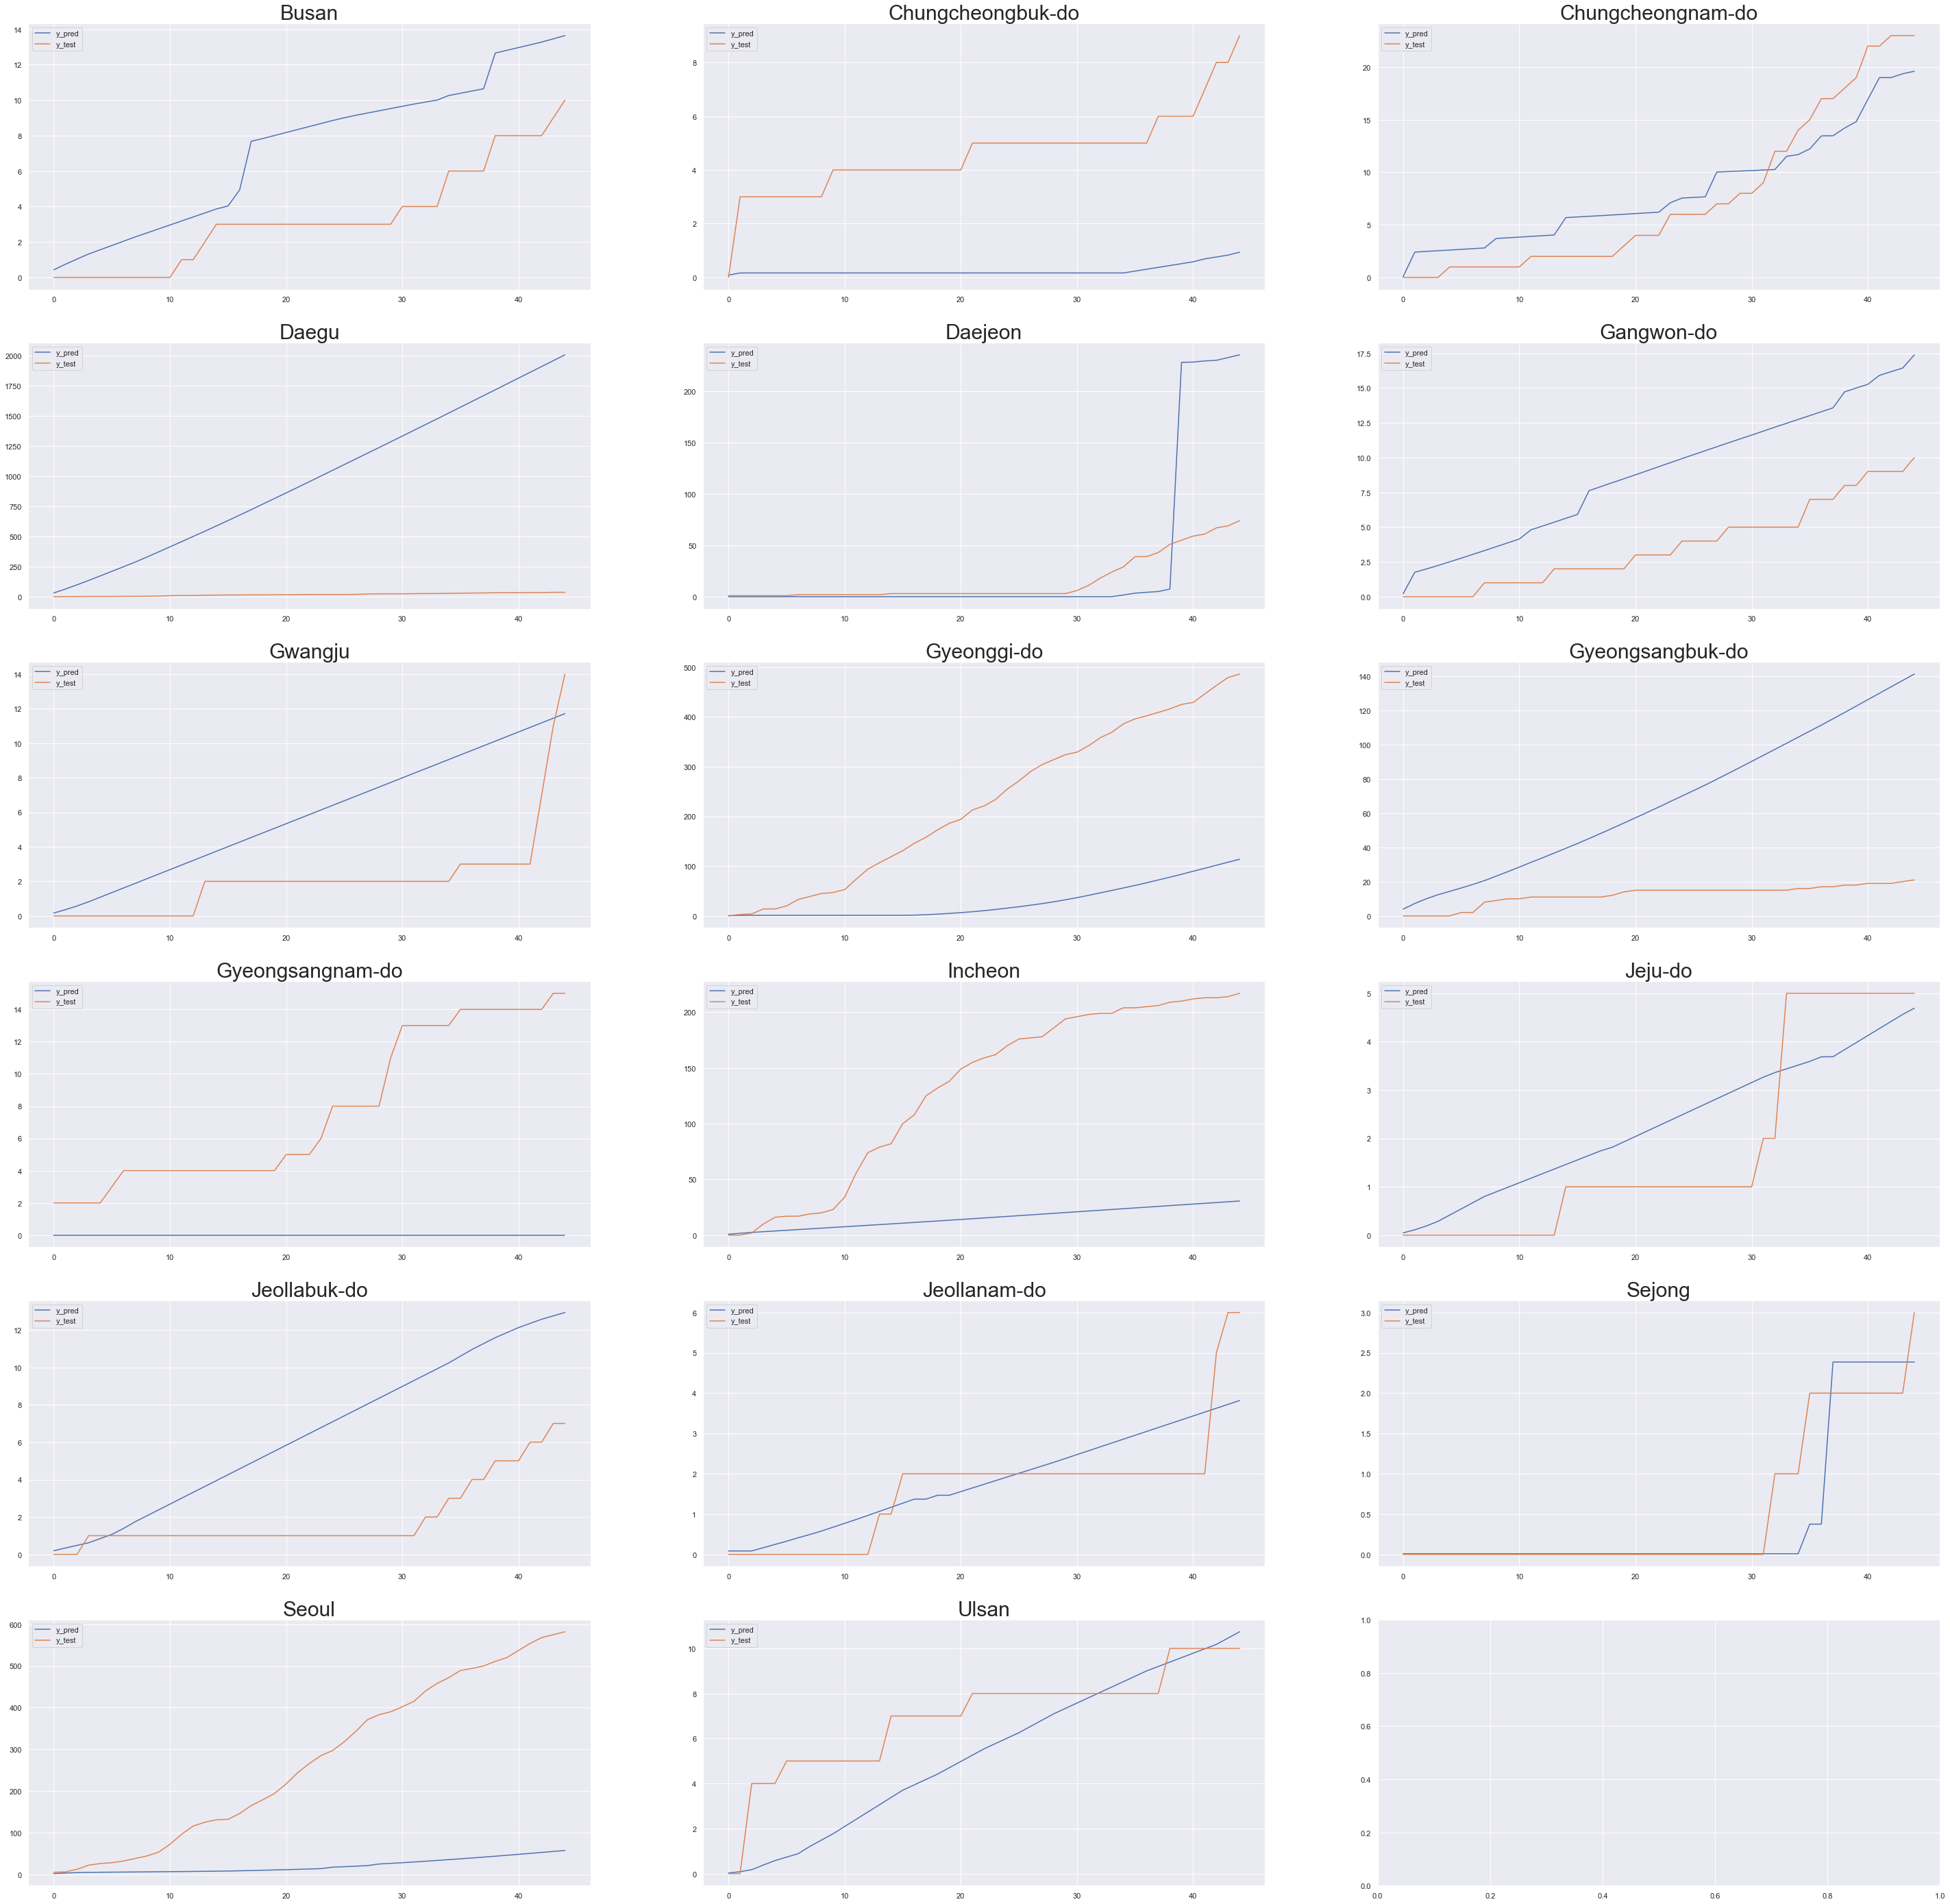

In [284]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [285]:
# ridge 회귀 시각화
y_dict=dict()
score=[]
for reg in regions:
    # 다항 X_data 생성
    pf1=PolynomialFeatures(degree=1,include_bias=False)
    pf2=PolynomialFeatures(degree=4,include_bias=False)
    
    X_train=X_dict[reg][:112].values
    y_train=province_confirmed[reg][5:117].values
    X_test=X_dict[reg][112:-5].values
    y_test=province_confirmed[reg][117:].values
    
    polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
    polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
    polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
    polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

    polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
    polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
    
    model=Ridge()
    model.fit(polynominal_X_train,y_train)
    
    y_pred=model.predict(polynominal_X_test)
    y_pred=np.where(y_pred<0,0,y_pred)
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,y_test))
    score.append(mean_squared_error(y_pred,y_test))
print('score_mean : ',np.mean(score))

Busan 0.4037556177839203
Chungcheongbuk-do 0.3054327224100721
Chungcheongnam-do 0.8549473420844436
Daegu 949.7264438140468
Daejeon 996.0674705374001
Gangwon-do 0.3165665450050183
Gwangju 0.9417340056117314
Gyeonggi-do 102.34186971826776
Gyeongsangbuk-do 2.456704642167364
Gyeongsangnam-do 0.592217867385753
Incheon 45.08810577623214
Jeju-do 0.23765030166304427
Jeollabuk-do 0.15203778584416205
Jeollanam-do 0.24880123019953435
Sejong 0.14954572041198458
Seoul 179.86125998143885
Ulsan 0.5529328449075352
score_mean :  134.13514567369768


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.72803e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.7408e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.06199e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.98079e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.54702e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\line

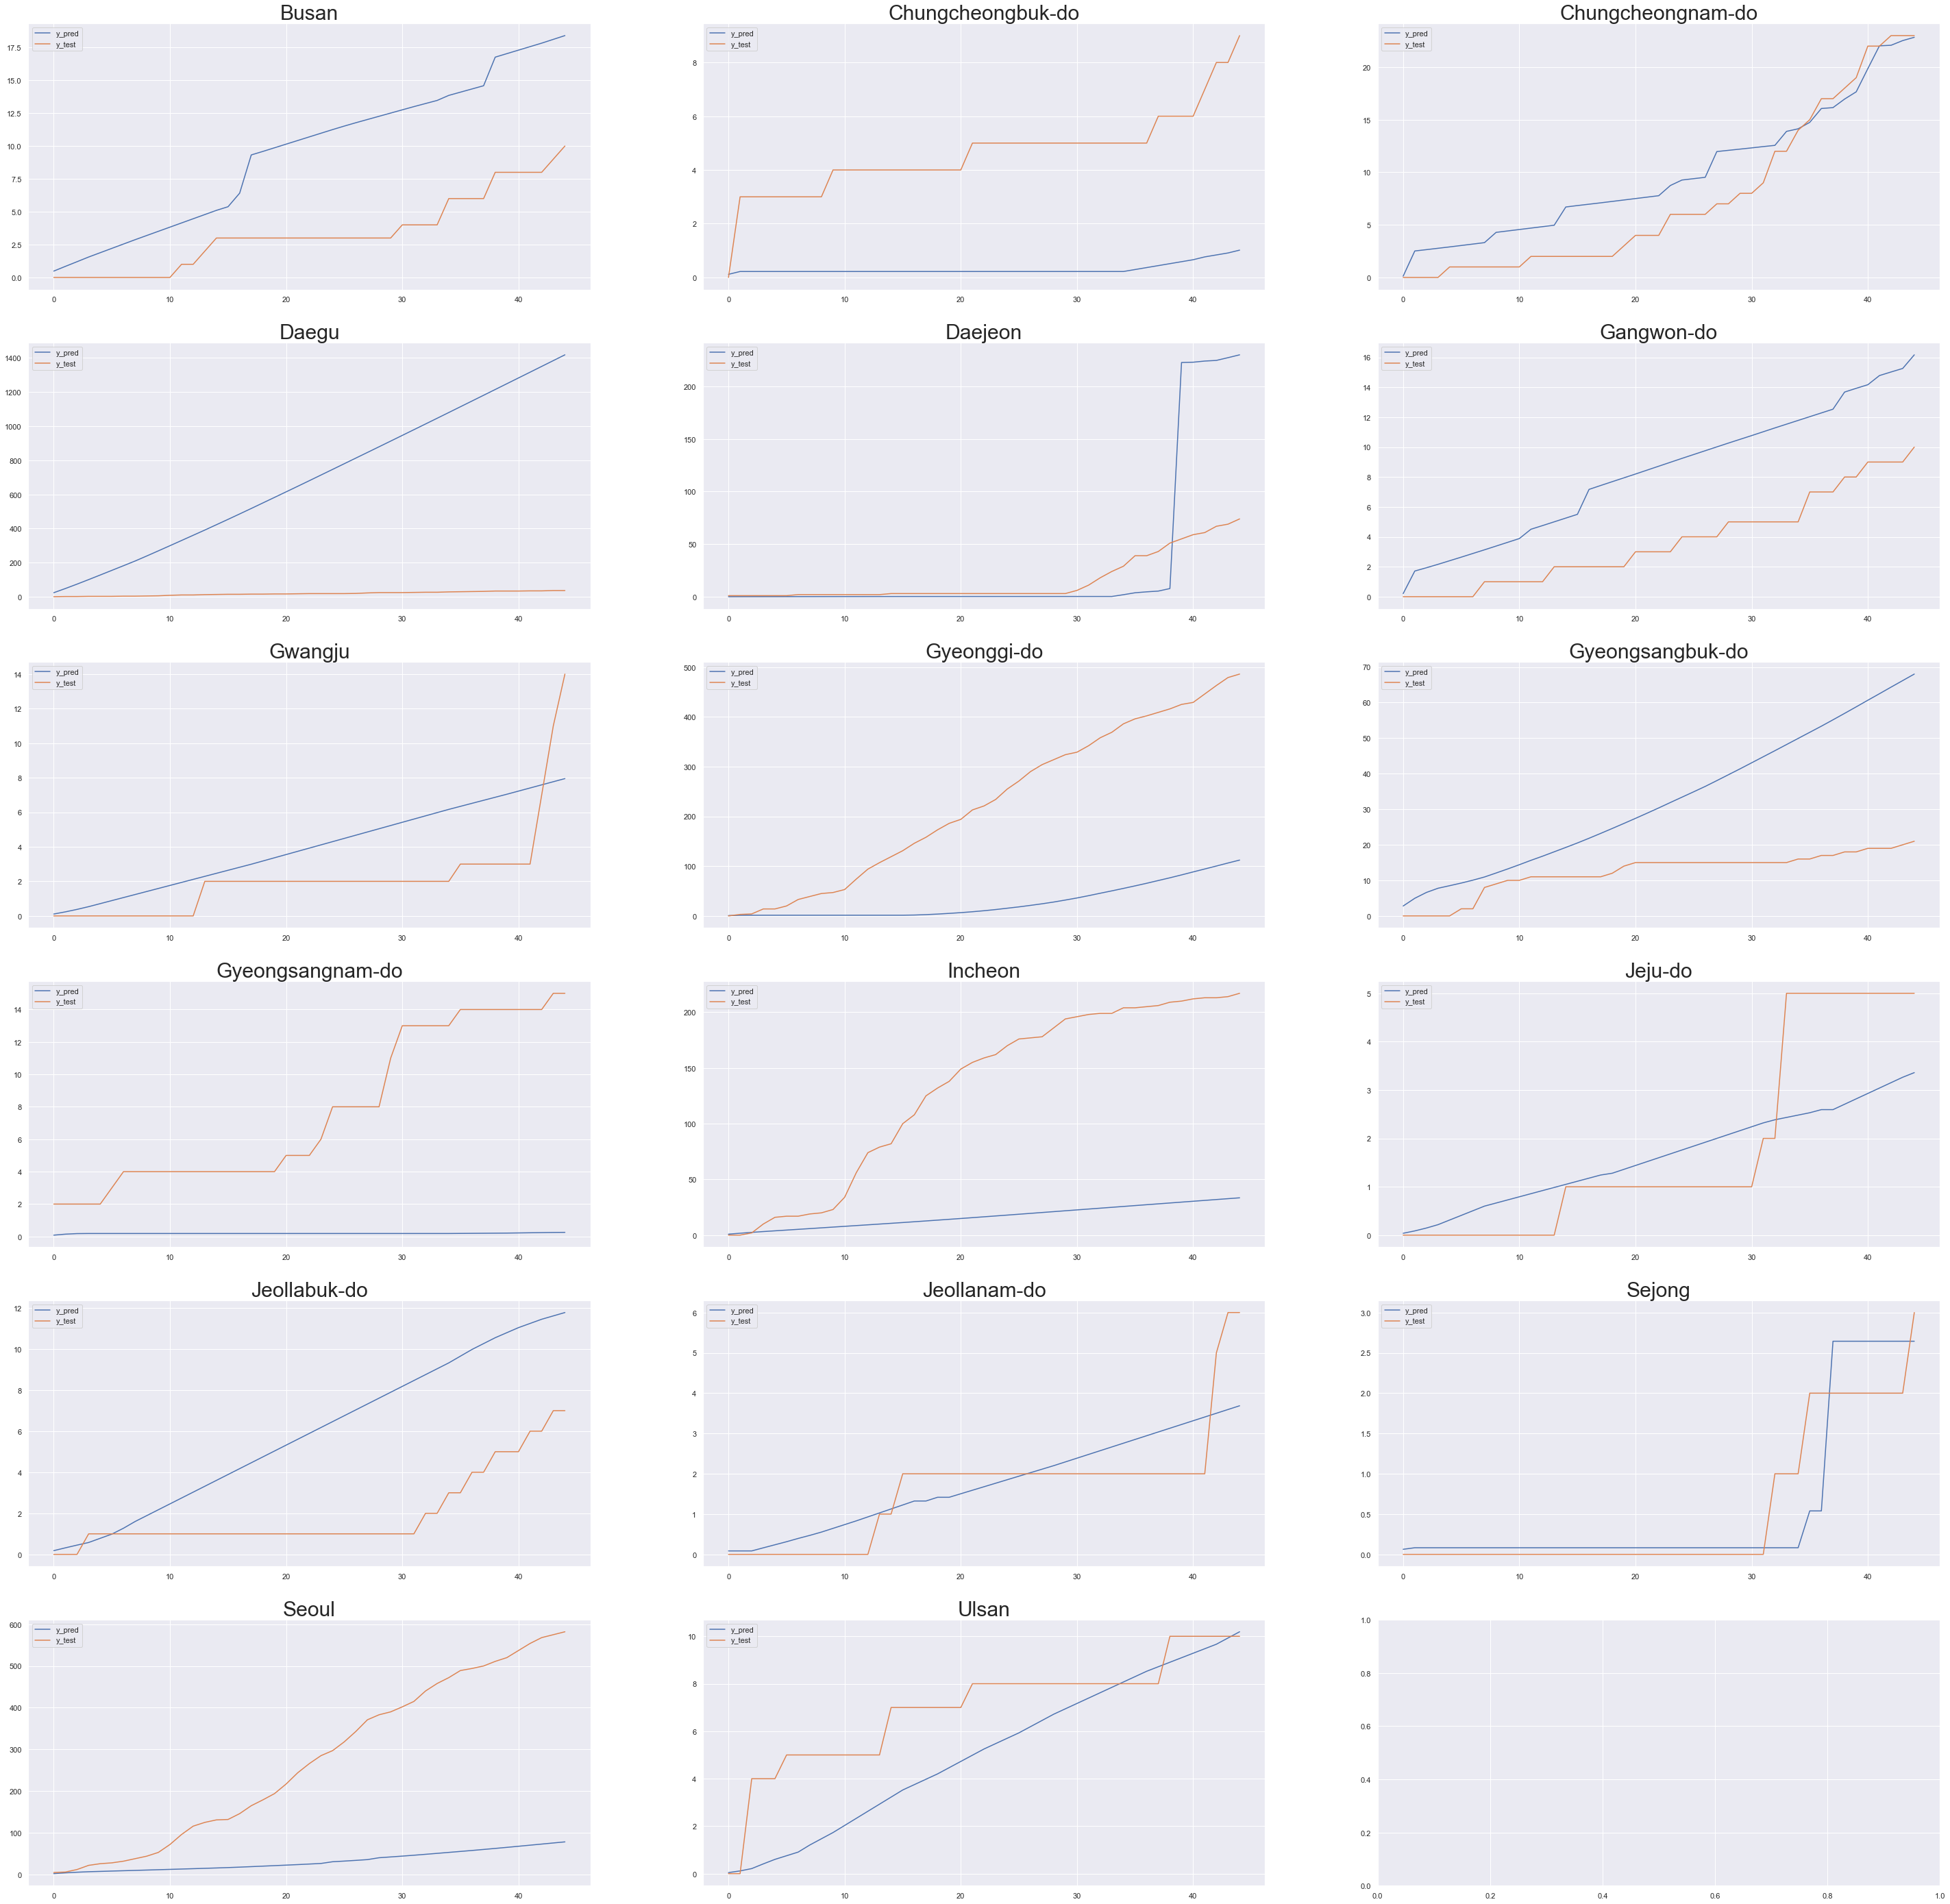

In [286]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [289]:
# Lasso 회귀 시각화
y_dict=dict()
score=[]
for reg in regions:
    # 다항 X_data 생성
    pf1=PolynomialFeatures(degree=6,include_bias=False)
    pf2=PolynomialFeatures(degree=1,include_bias=False)
    
    X_train=X_dict[reg][:112].values
    y_train=province_confirmed[reg][5:117].values
    X_test=X_dict[reg][112:-5].values
    y_test=province_confirmed[reg][117:].values
    
    polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
    polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
    polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
    polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

    polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
    polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
    
    model=Lasso()
    model.fit(polynominal_X_train,y_train)
    
    y_pred=model.predict(polynominal_X_test)
    y_pred=np.where(y_pred<0,0,y_pred)
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,y_test))
    score.append(mean_squared_error(y_pred,y_test))
print('score_mean : ',np.mean(score))

Busan 0.8267795362823303
Chungcheongbuk-do 0.3679712429131546
Chungcheongnam-do 1.1855449142714427
Daegu 1.3555555555555556
Daejeon 3234.7123350496176
Gangwon-do 0.4276581830273356
Gwangju 0.9408019491575157
Gyeonggi-do 54.09296503894424
Gyeongsangbuk-do 1.2222222222222223
Gyeongsangnam-do 1.1537845229735433
Incheon 8336568.729093222
Jeju-do 0.2328436100988772
Jeollabuk-do 0.13673165004957175
Jeollanam-do 0.25193413681787225
Sejong 0.2893734158208757
Seoul 112.20574578316959
Ulsan 0.5263177845337136
score_mean :  490586.97986222454


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.91404442387488, tolerance: 0.08948571428571428
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.83935820410317, tolerance: 0.0108
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 620.0717042388787, tolerance: 0.1320857142857143
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

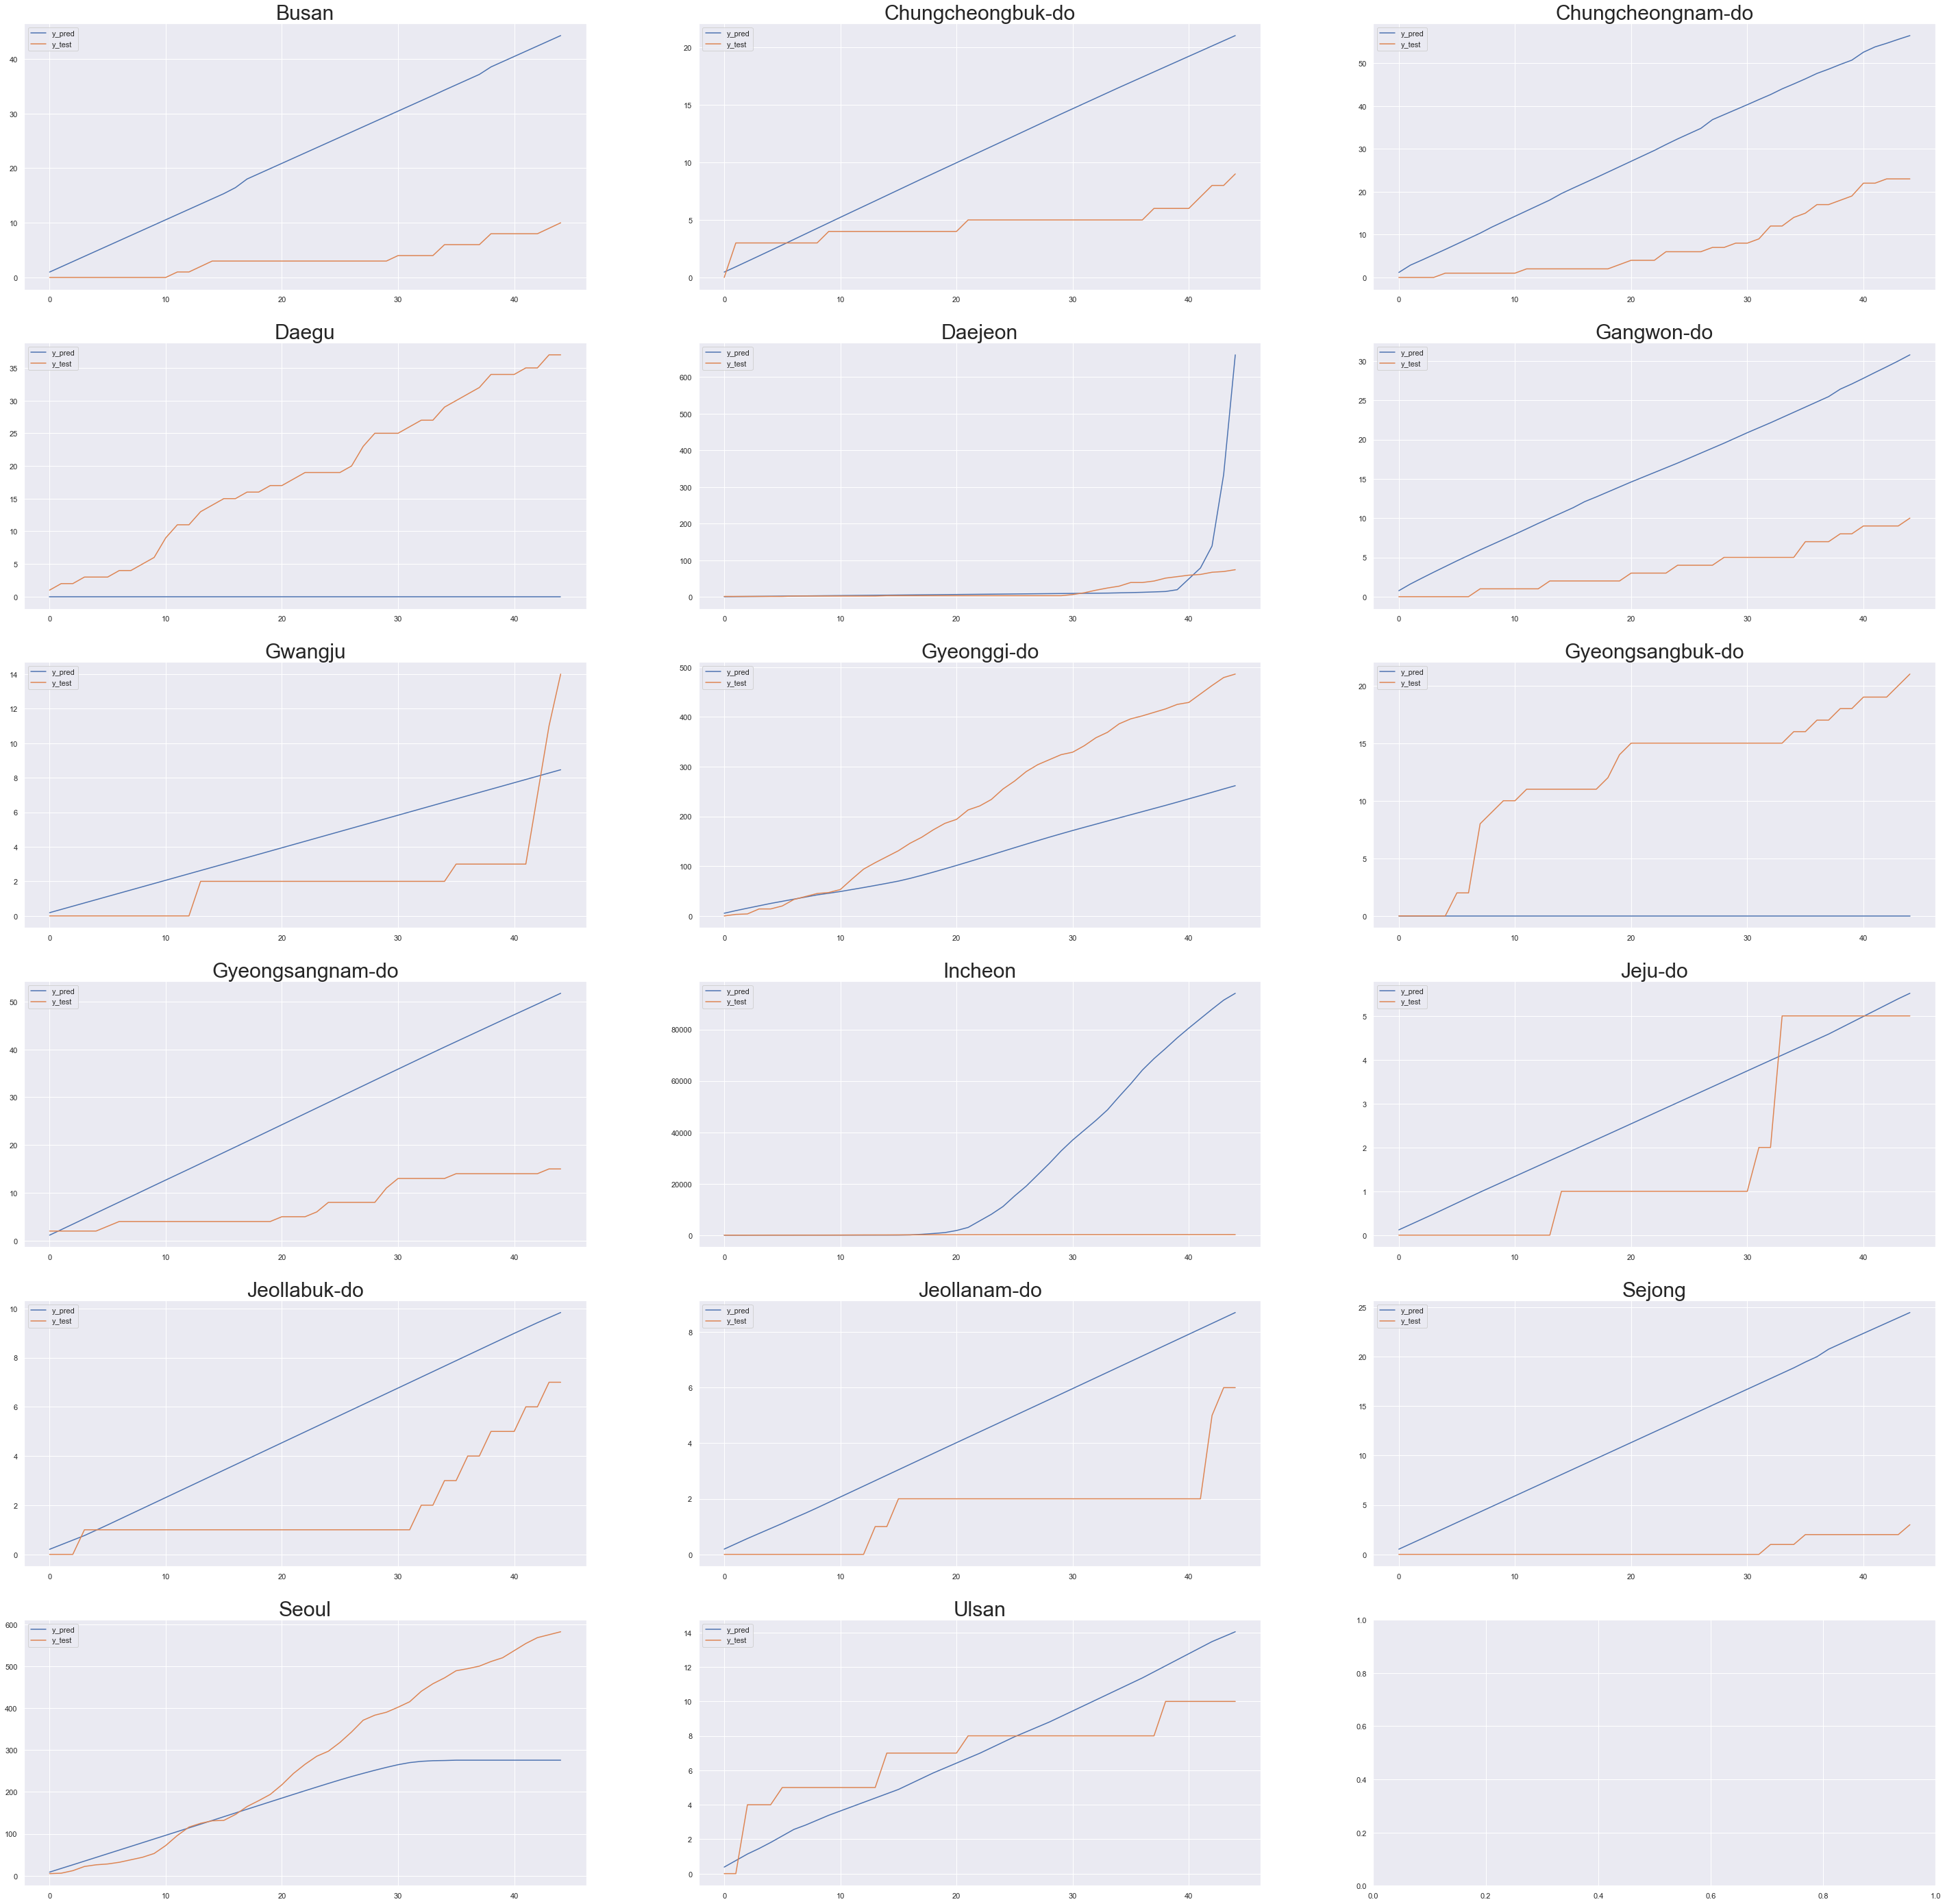

In [290]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [293]:
# SVR 시각화
y_dict=dict()
score=[]
for reg in regions:
    model=SVR(C=10,gamma=0.01)
    model.fit(X_dict[reg][:112],province_confirmed[reg][5:117])
    y_pred=model.predict(X_dict[reg][112:-5])
    y_pred=np.where(y_pred<0,0,y_pred)
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,province_confirmed[reg][117:]))
    score.append(mean_squared_error(y_pred,province_confirmed[reg][117:]))
print('score_mean : ',np.mean(score))

Busan 0.7493475757638881
Chungcheongbuk-do 0.32228390669928747
Chungcheongnam-do 1.452360979724609
Daegu 256.0990183927323
Daejeon 6.308119832169358
Gangwon-do 0.546312136930309
Gwangju 0.9752061427746259
Gyeonggi-do 80.44424792354614
Gyeongsangbuk-do 55.901971348969106
Gyeongsangnam-do 0.599411047218623
Incheon 46.66244985330777
Jeju-do 0.24424723599394985
Jeollabuk-do 0.13444057974861373
Jeollanam-do 0.2495547147771252
Sejong 0.23309113948116
Seoul 123.04798523350142
Ulsan 0.5472204896636845
score_mean :  33.79513344311776


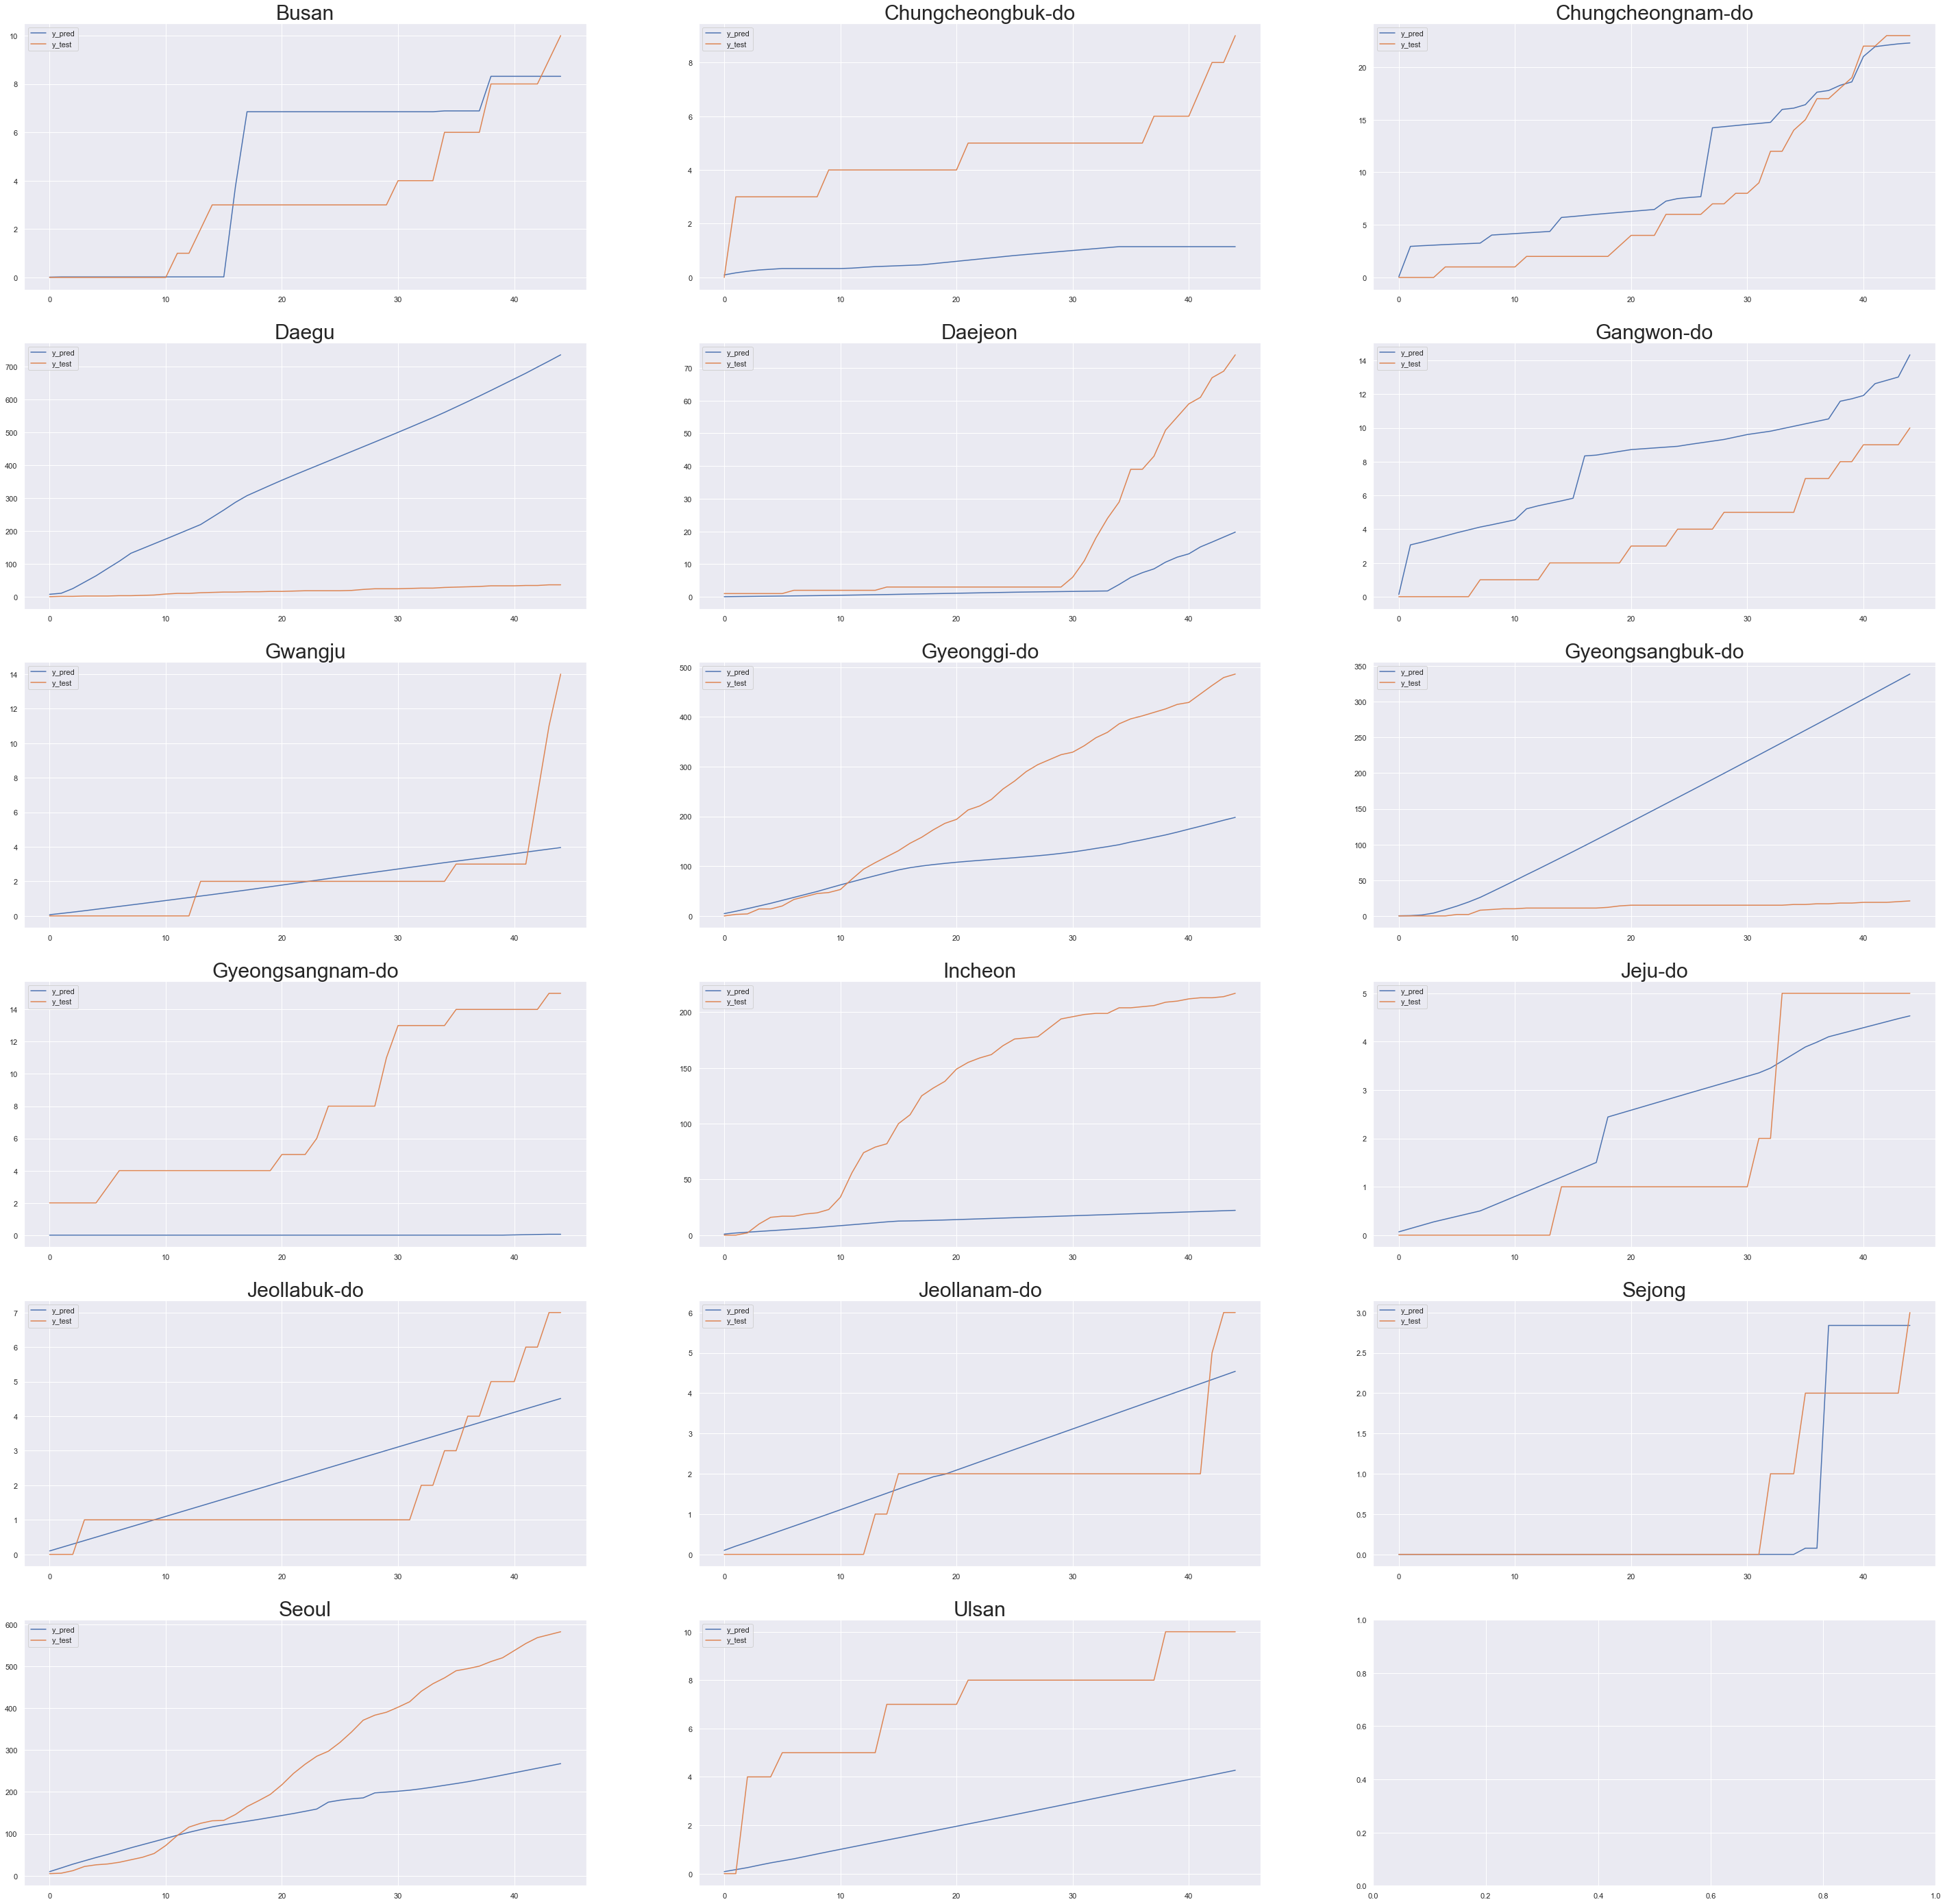

In [294]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [295]:
# 랜덤포레스트 시각화
y_dict=dict()
score=[]
for reg in regions:
    model=RandomForestRegressor(n_estimators=1000,max_depth=2)
    model.fit(X_dict[reg][:112],province_confirmed[reg][5:117])
    y_pred=model.predict(X_dict[reg][112:-5])
    y_pred=np.where(y_pred<0,0,y_pred)
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,province_confirmed[reg][117:]))
    score.append(mean_squared_error(y_pred,province_confirmed[reg][117:]))
print('score_mean : ',np.mean(score))

Busan 0.48111469612751145
Chungcheongbuk-do 0.29333028223024854
Chungcheongnam-do 2.204809140972116
Daegu 10.724297591060404
Daejeon 6.816624211773747
Gangwon-do 0.4195260333347982
Gwangju 0.9525464393885088
Gyeonggi-do 82.37051569218495
Gyeongsangbuk-do 12.610754019616726
Gyeongsangnam-do 0.4965227226780844
Incheon 44.398540106462015
Jeju-do 0.2298111702325594
Jeollabuk-do 0.13773426496349686
Jeollanam-do 0.24792806164662645
Sejong 0.06222083261258237
Seoul 111.06498424304102
Ulsan 0.5200575496337498
score_mean :  16.11948923870348


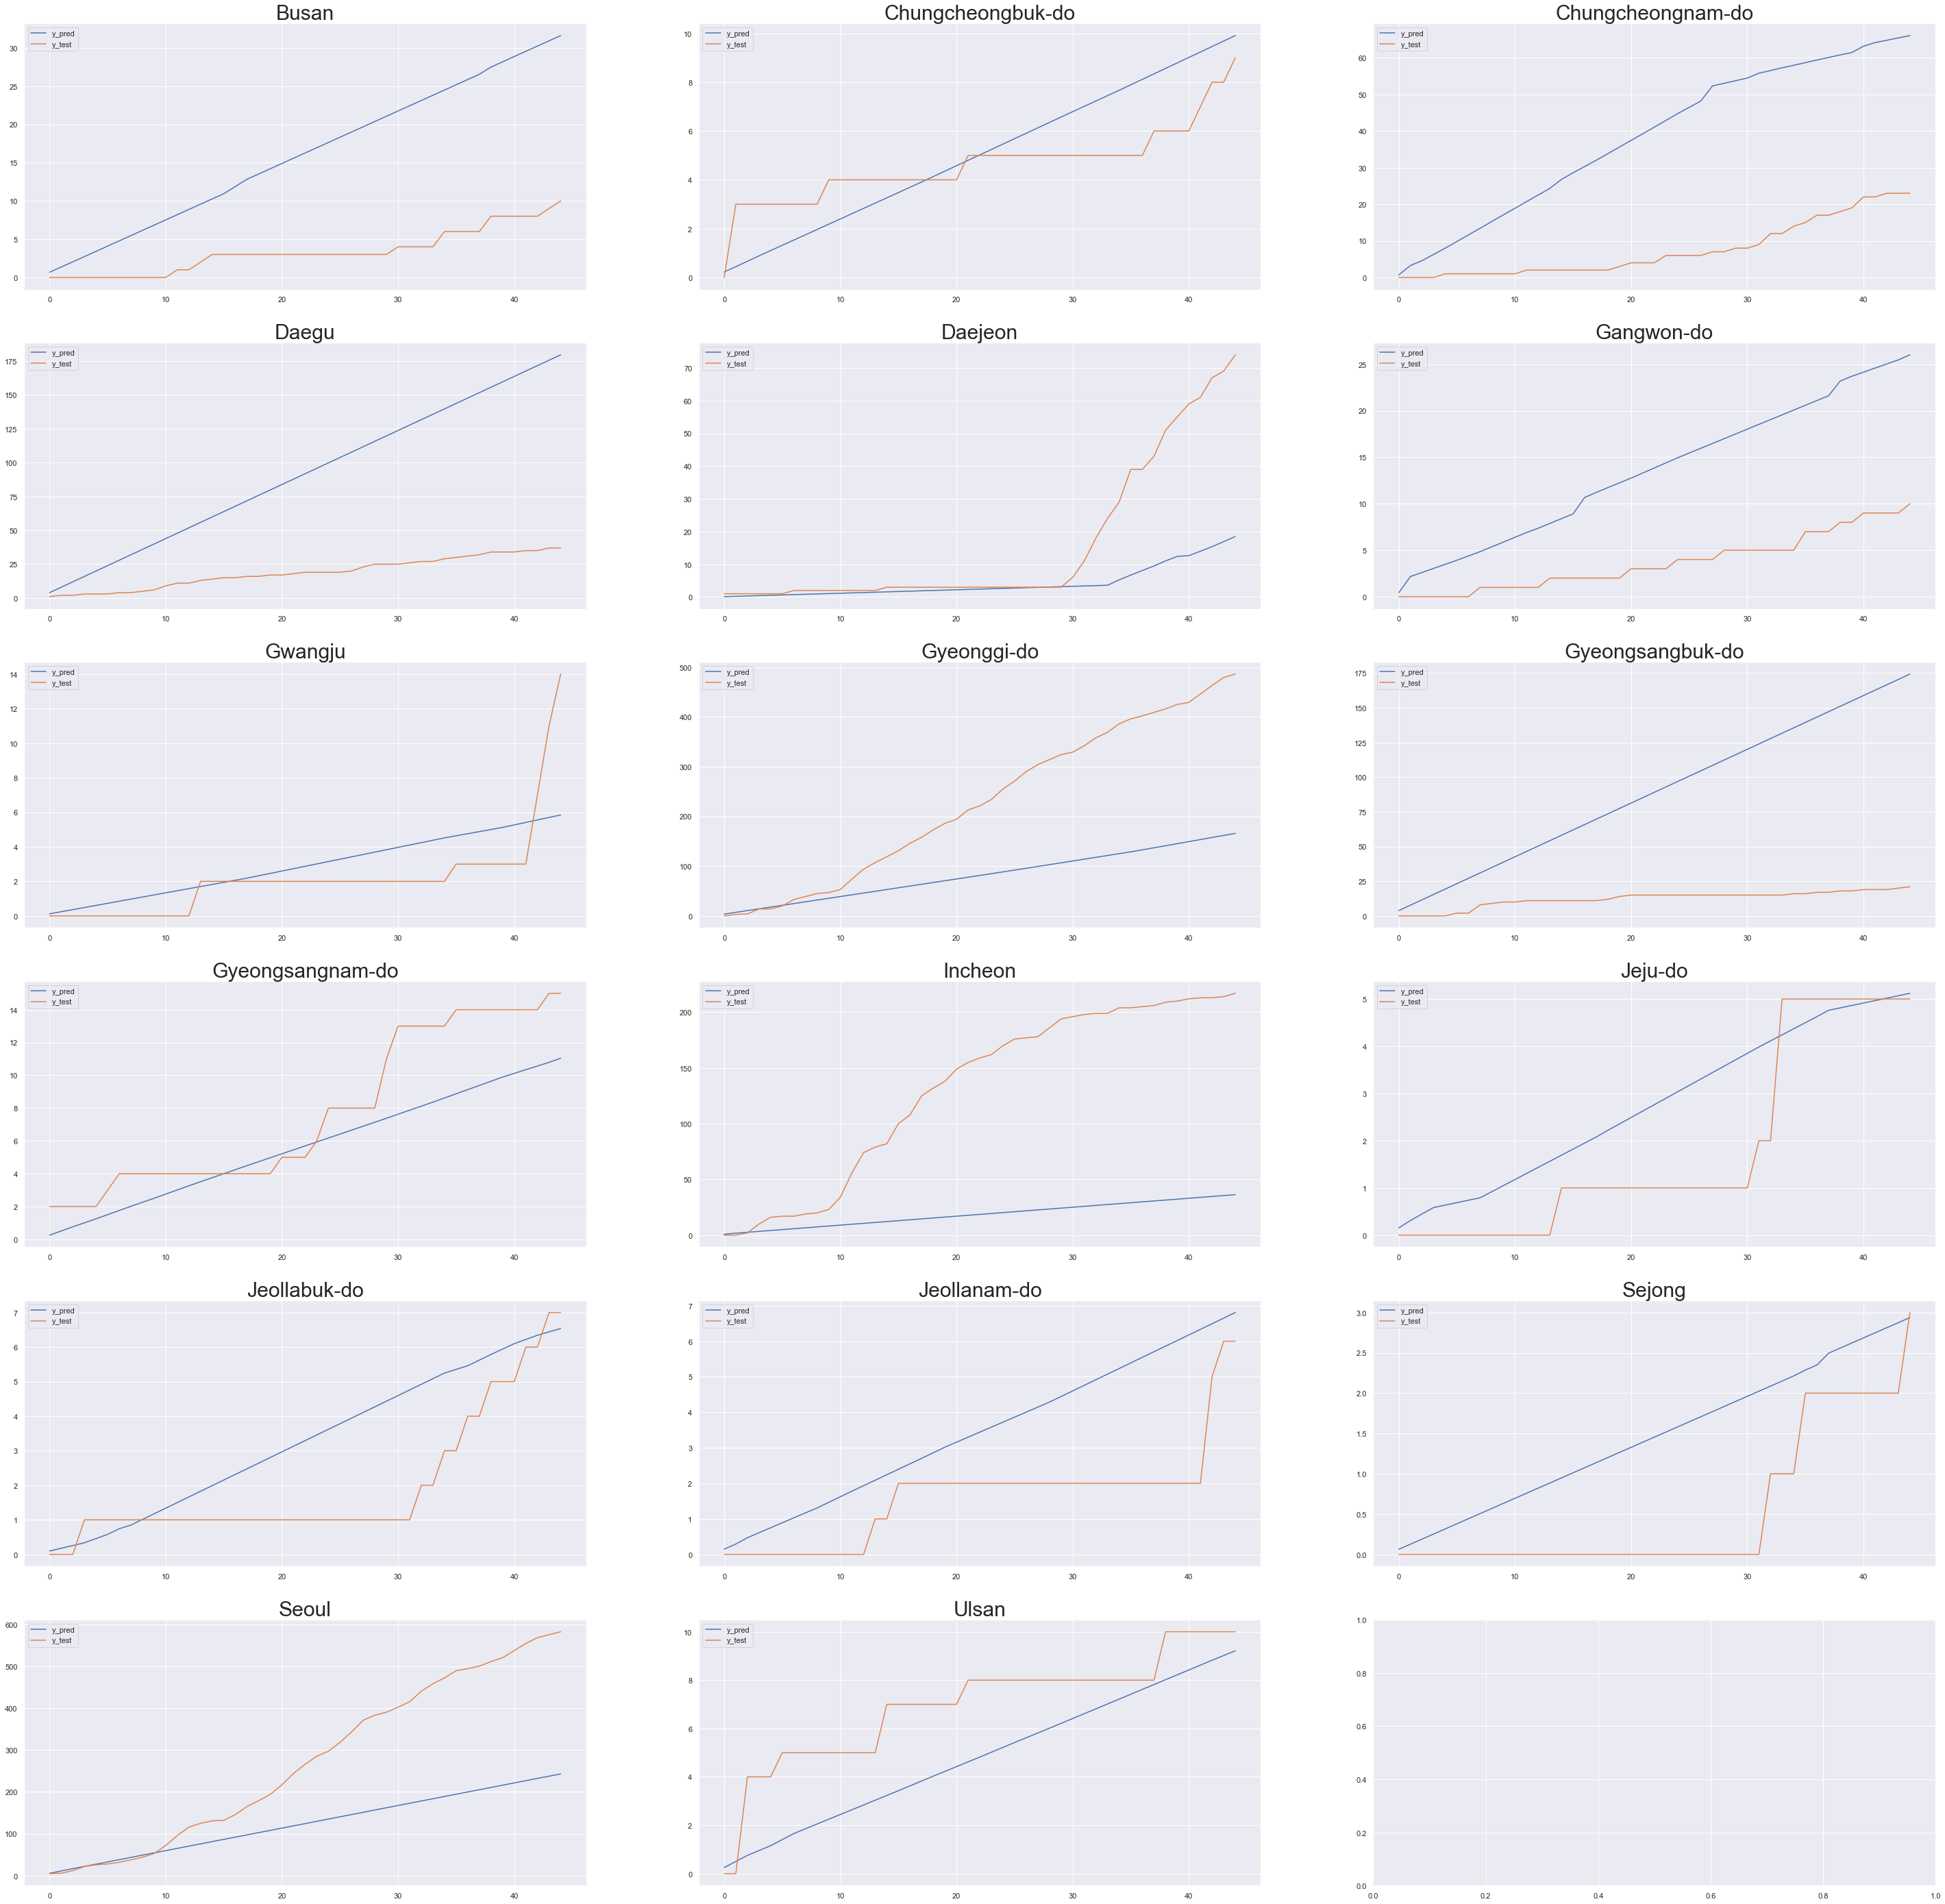

In [296]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [ ]:
# 생각해보니까 사람 수는 정수임

In [303]:
# 기초 선형회귀 시각화 (확률 정수화 수정)
pf1=PolynomialFeatures(degree=1,include_bias=False)
pf2=PolynomialFeatures(degree=4,include_bias=False)
polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

# train, test
polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)

y_dict=dict()
score=[]
for reg in regions:
    # 다항 X_data 생성
    pf1=PolynomialFeatures(degree=1,include_bias=False)
    pf2=PolynomialFeatures(degree=4,include_bias=False)
    
    X_train=X_dict[reg][:112].values
    y_train=province_confirmed[reg][5:117].values
    X_test=X_dict[reg][112:-5].values
    y_test=province_confirmed[reg][117:].values
    
    polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
    polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
    polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
    polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

    polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
    polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
    
    model=LinearRegression()
    model.fit(polynominal_X_train,y_train)
    
    y_pred=model.predict(polynominal_X_test)
    y_pred=np.where(y_pred<0,0,y_pred)
    y_pred=np.trunc(y_pred.cumsum())
    y_dict[reg]=y_pred
    
    print('{}'.format(reg),mean_squared_error(y_pred,y_test.cumsum()))
    score.append(mean_squared_error(y_pred,y_test.cumsum()))
print('score_mean : ',np.mean(score))

Busan 15.444444444444445
Chungcheongbuk-do 23.68888888888889
Chungcheongnam-do 7.111111111111111
Daegu 1250799.4666666666
Daejeon 3859.9333333333334
Gangwon-do 26.377777777777776
Gwangju 16.288888888888888
Gyeonggi-do 55230.13333333333
Gyeongsangbuk-do 4194.844444444445
Gyeongsangnam-do 81.5111111111111
Incheon 18013.333333333332
Jeju-do 1.2444444444444445
Jeollabuk-do 23.622222222222224
Jeollanam-do 0.8444444444444444
Sejong 0.26666666666666666
Seoul 95064.4
Ulsan 6.977777777777778
score_mean :  83962.67581699346


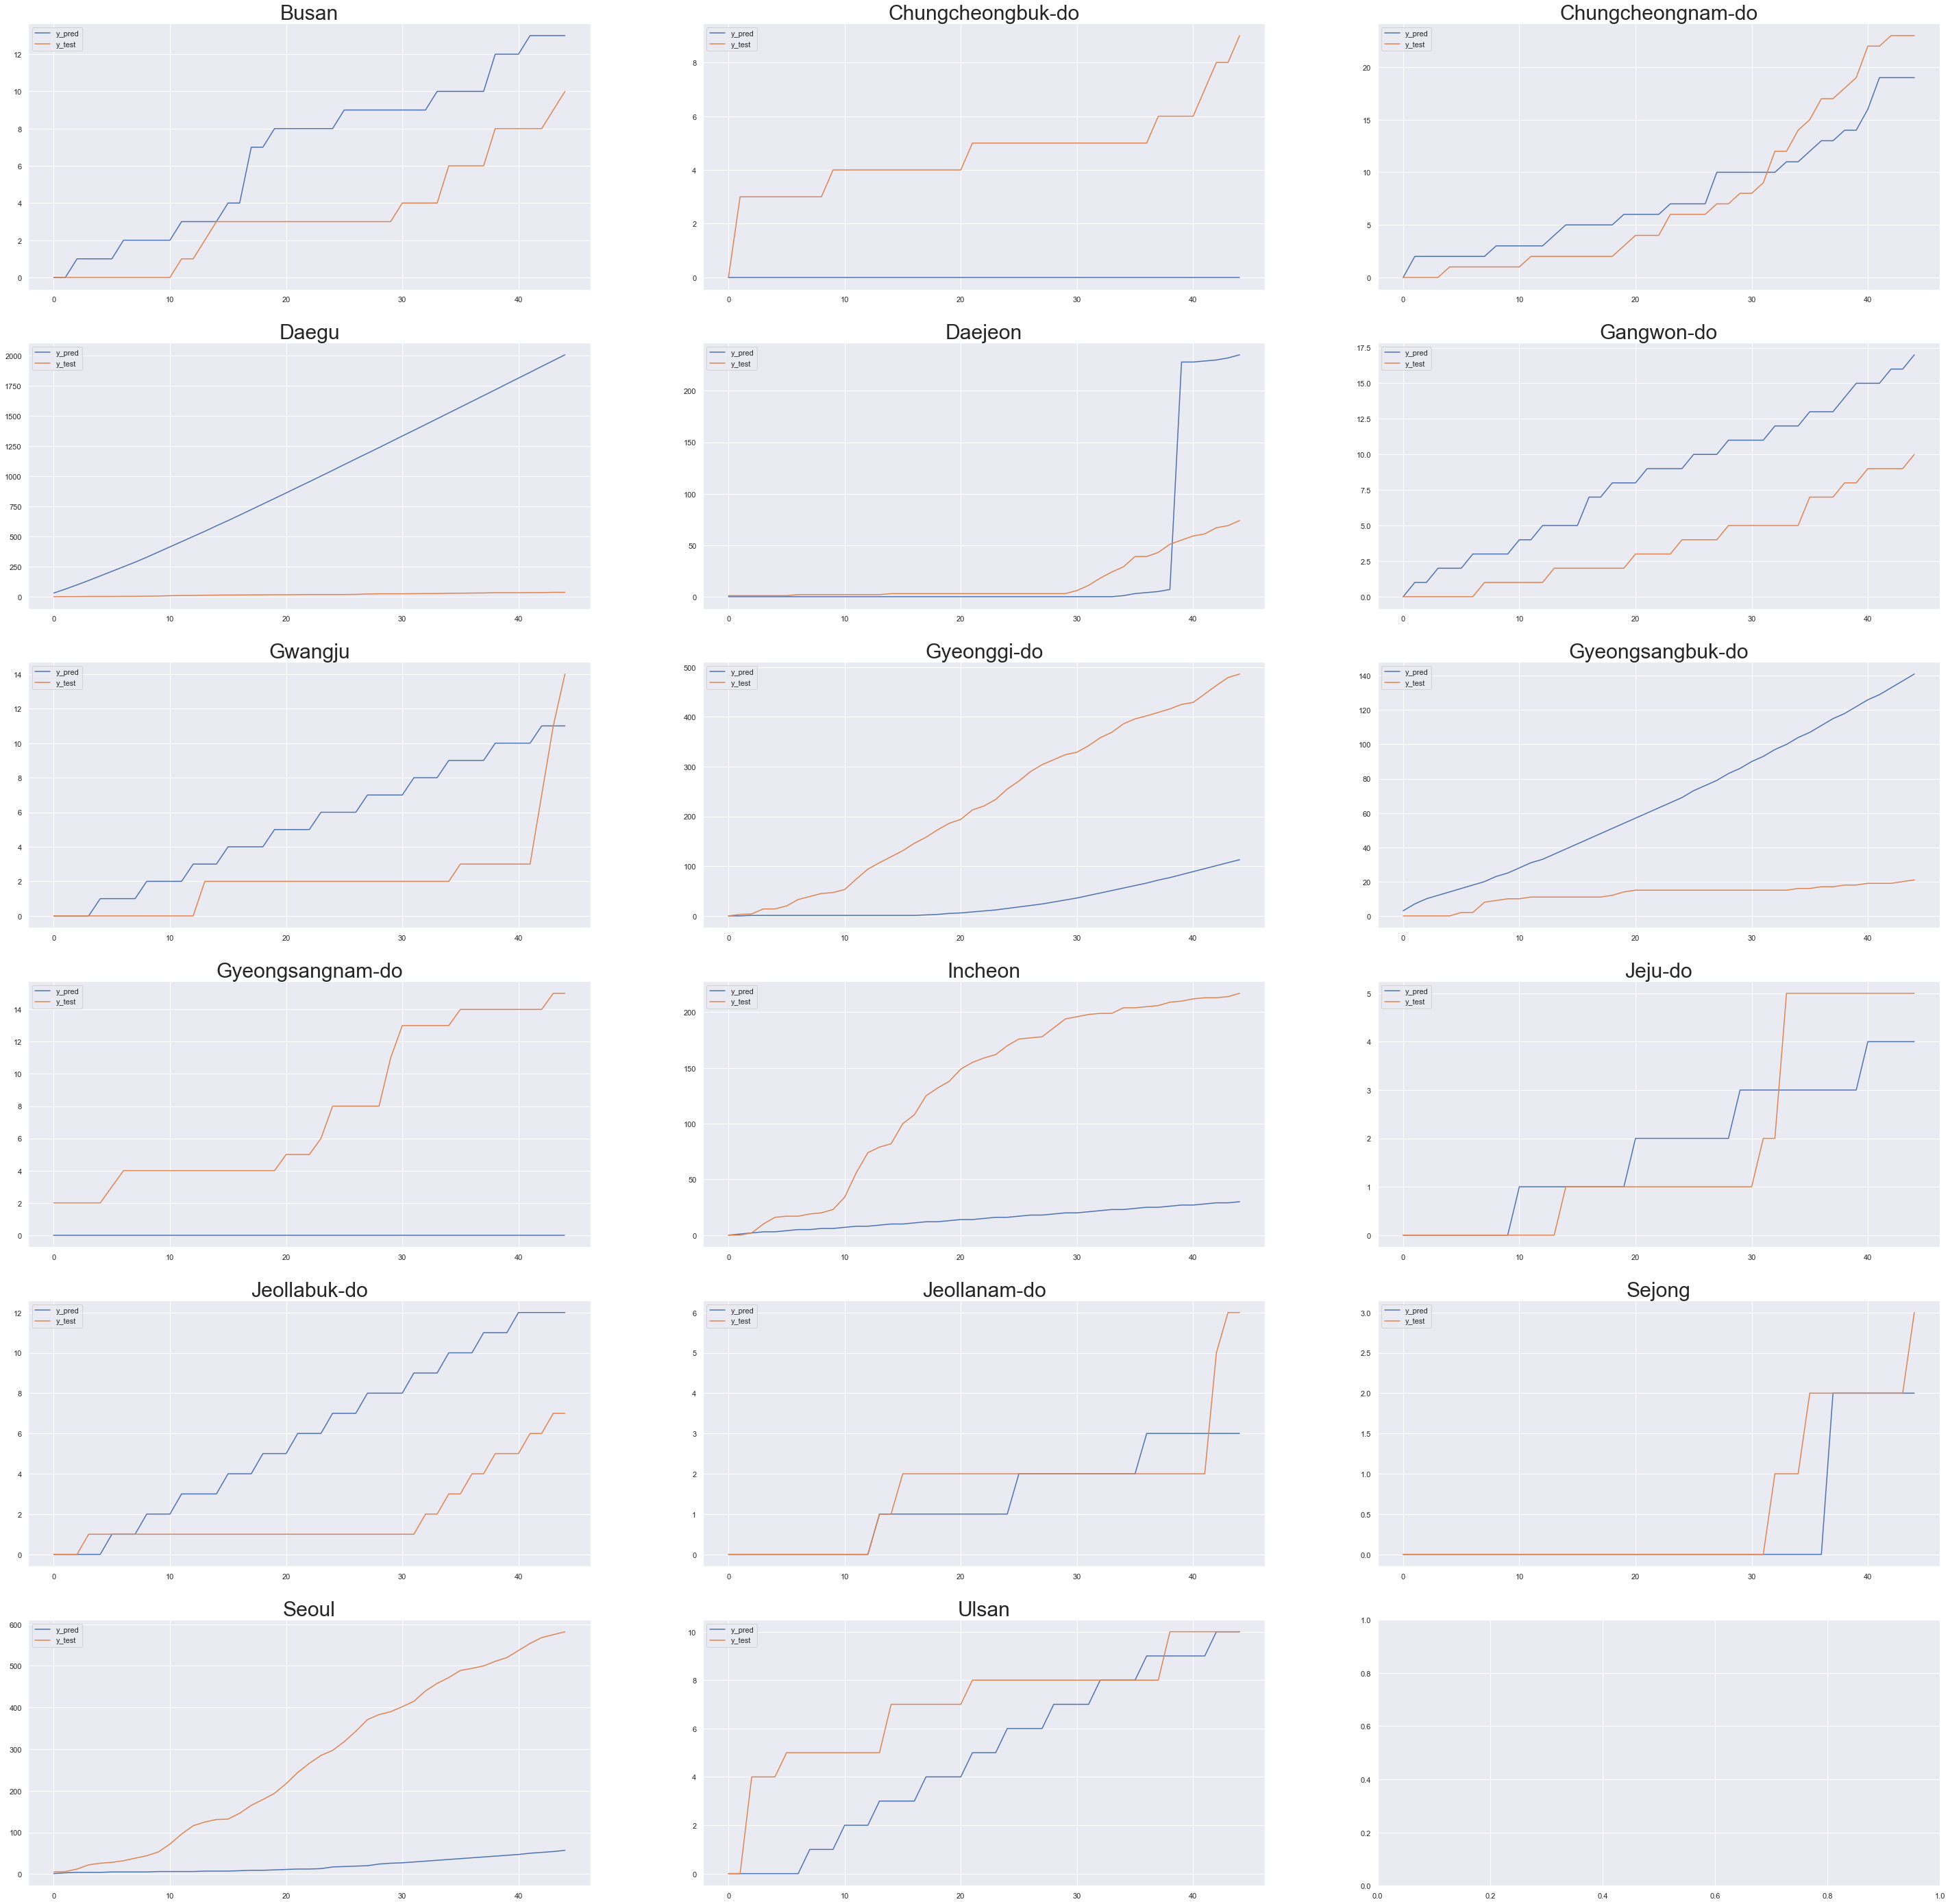

In [304]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]],label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [305]:
# Ridge 회귀 (확률 정수화 수정)
pf1=PolynomialFeatures(degree=1,include_bias=False)
pf2=PolynomialFeatures(degree=4,include_bias=False)
polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

# train, test
polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)

y_dict=dict()
score=[]
for reg in regions:
    # 다항 X_data 생성
    pf1=PolynomialFeatures(degree=1,include_bias=False)
    pf2=PolynomialFeatures(degree=4,include_bias=False)
    
    X_train=X_dict[reg][:112].values
    y_train=province_confirmed[reg][5:117].values
    X_test=X_dict[reg][112:-5].values
    y_test=province_confirmed[reg][117:].values
    
    polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
    polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
    polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
    polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

    polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
    polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
    
    model=Ridge()
    model.fit(polynominal_X_train,y_train)
    
    y_pred=model.predict(polynominal_X_test)
    y_pred=np.where(y_pred<0,0,y_pred)
    y_pred=np.trunc(y_pred.cumsum())
    y_dict[reg]=y_pred
    
    print('{}'.format(reg),mean_squared_error(y_pred,y_test.cumsum()))
    score.append(mean_squared_error(y_pred,y_test.cumsum()))
print('score_mean : ',np.mean(score))

Busan 41.86666666666667
Chungcheongbuk-do 23.31111111111111
Chungcheongnam-do 7.6
Daegu 618867.6222222223
Daejeon 3627.266666666667
Gangwon-do 19.822222222222223
Gwangju 5.644444444444445
Gyeonggi-do 55467.08888888889
Gyeongsangbuk-do 587.5777777777778
Gyeongsangnam-do 81.5111111111111
Incheon 17640.82222222222
Jeju-do 2.0444444444444443
Jeollabuk-do 18.133333333333333
Jeollanam-do 0.8444444444444444
Sejong 0.26666666666666666
Seoul 87057.3111111111
Ulsan 7.866666666666666
score_mean :  46085.682352941185


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.72803e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.7408e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.06199e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.98079e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.54702e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\line

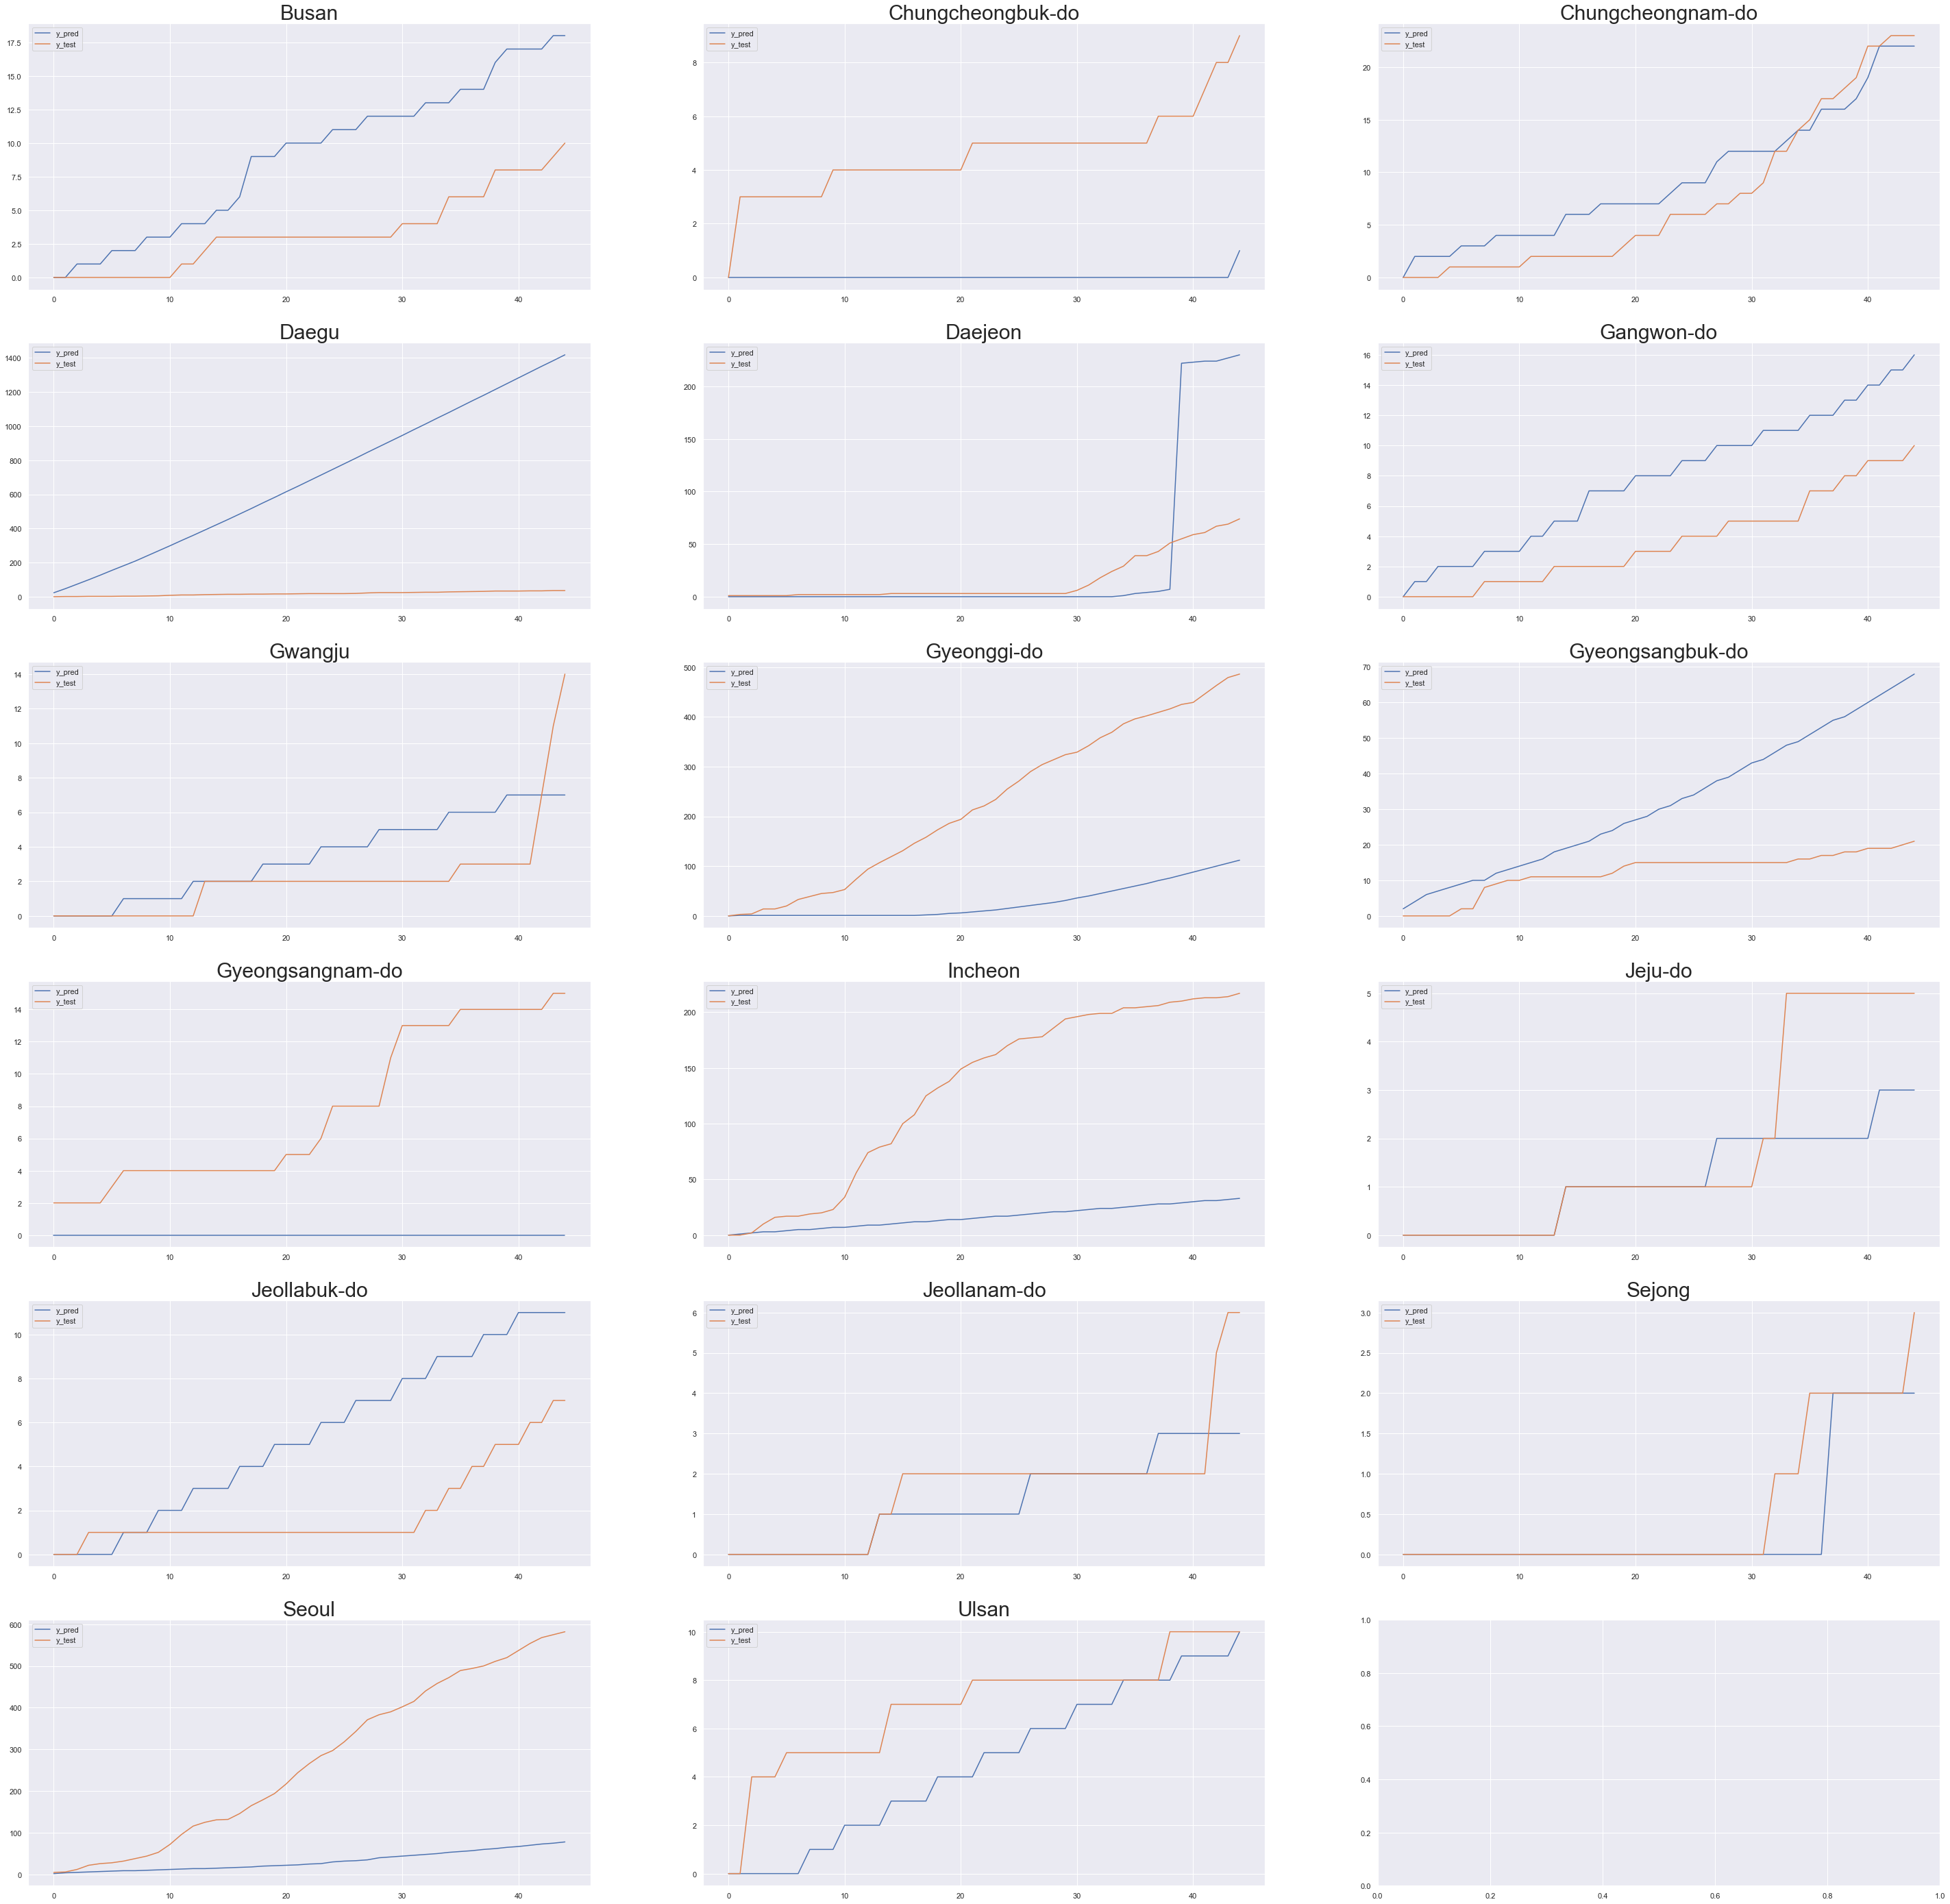

In [306]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]],label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [307]:
# Lasso 회귀 시각화 (확률 정수화 수정)
pf1=PolynomialFeatures(degree=1,include_bias=False)
pf2=PolynomialFeatures(degree=4,include_bias=False)
polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

# train, test
polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)

y_dict=dict()
score=[]
for reg in regions:
    # 다항 X_data 생성
    pf1=PolynomialFeatures(degree=1,include_bias=False)
    pf2=PolynomialFeatures(degree=4,include_bias=False)
    
    X_train=X_dict[reg][:112].values
    y_train=province_confirmed[reg][5:117].values
    X_test=X_dict[reg][112:-5].values
    y_test=province_confirmed[reg][117:].values
    
    polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
    polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
    polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
    polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

    polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
    polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
    
    model=Ridge()
    model.fit(polynominal_X_train,y_train)
    
    y_pred=model.predict(polynominal_X_test)
    y_pred=np.where(y_pred<0,0,y_pred)
    y_pred=np.trunc(y_pred.cumsum())
    y_dict[reg]=y_pred
    
    print('{}'.format(reg),mean_squared_error(y_pred,y_test.cumsum()))
    score.append(mean_squared_error(y_pred,y_test.cumsum()))
print('score_mean : ',np.mean(score))

Busan 41.86666666666667
Chungcheongbuk-do 23.31111111111111
Chungcheongnam-do 7.6
Daegu 618867.6222222223
Daejeon 3627.266666666667
Gangwon-do 19.822222222222223
Gwangju 5.644444444444445
Gyeonggi-do 55467.08888888889
Gyeongsangbuk-do 587.5777777777778
Gyeongsangnam-do 81.5111111111111
Incheon 17640.82222222222
Jeju-do 2.0444444444444443
Jeollabuk-do 18.133333333333333
Jeollanam-do 0.8444444444444444
Sejong 0.26666666666666666
Seoul 87057.3111111111
Ulsan 7.866666666666666
score_mean :  46085.682352941185


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.72803e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.7408e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.06199e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.98079e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.54702e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\line

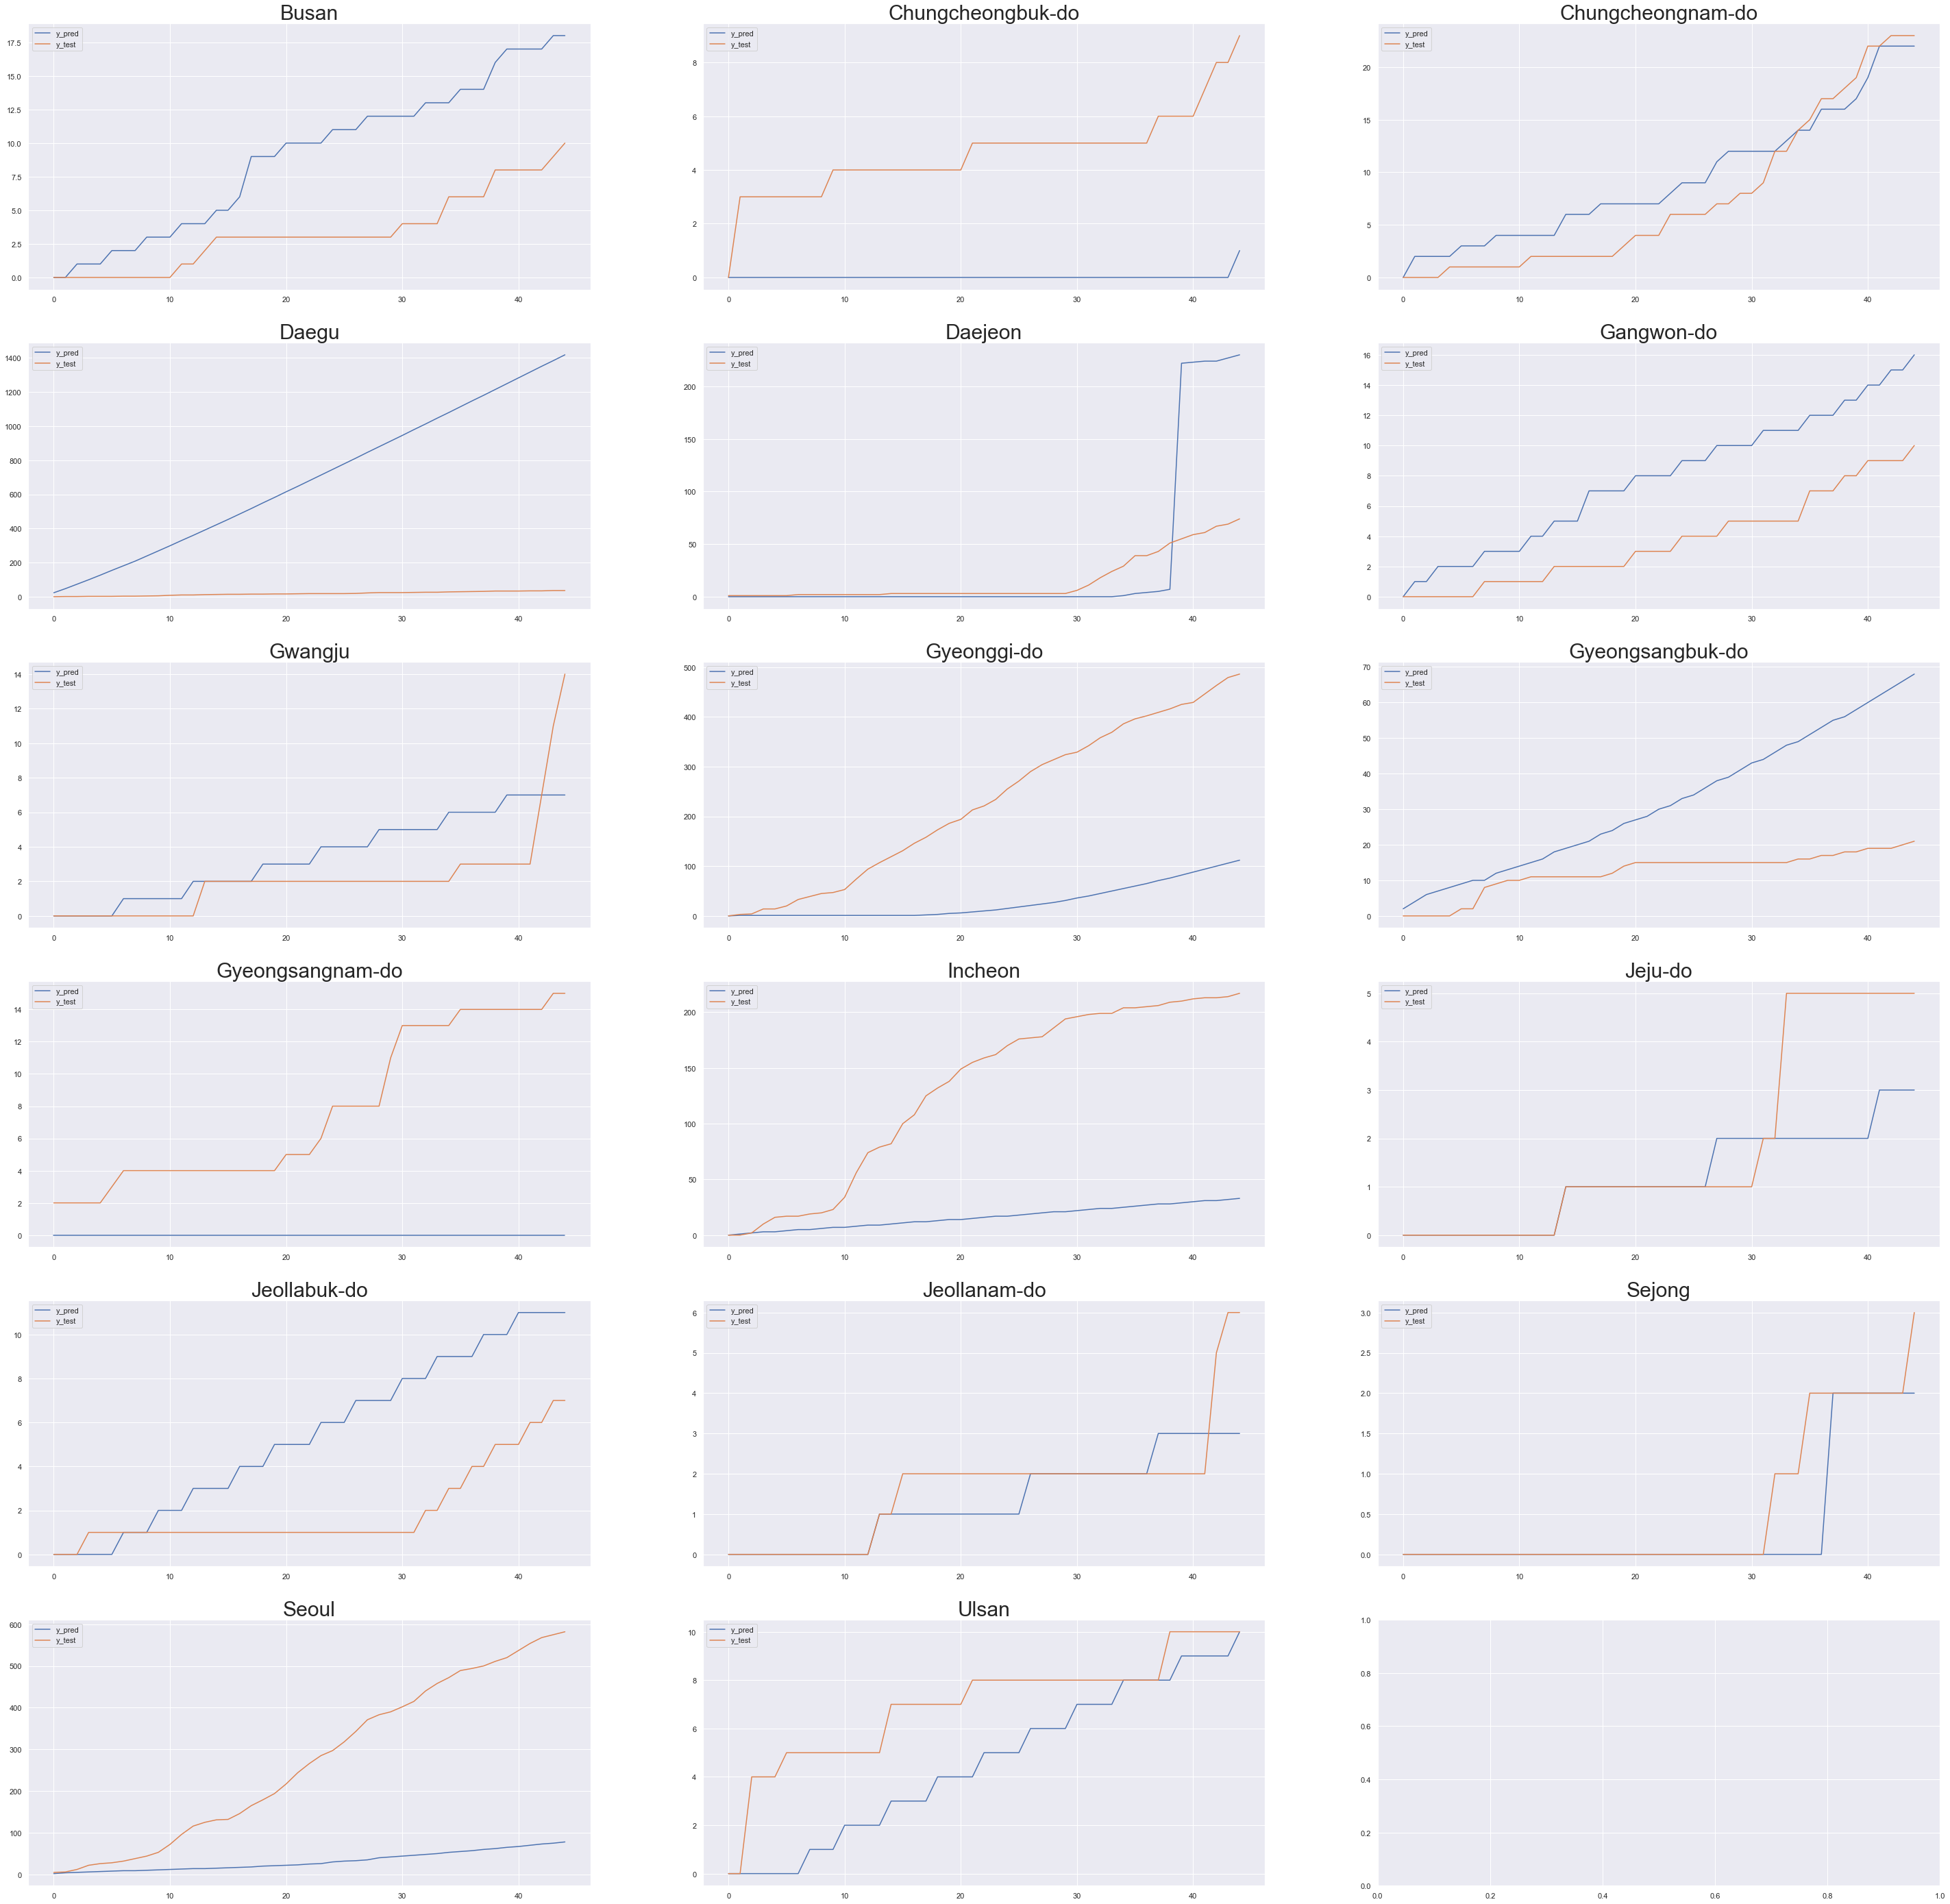

In [308]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]],label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [315]:
# SVR 시각화 (확률 정수화 수정)
y_dict=dict()
score=[]
for reg in regions:
    model=SVR(C=10,gamma=0.01)
    model.fit(X_dict[reg][:112],province_confirmed[reg][5:117])
    y_pred=model.predict(X_dict[reg][112:-5])
    y_pred=np.where(y_pred<0,0,y_pred)
    y_pred=np.trunc(y_pred.cumsum())
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,province_confirmed[reg][117:]))
    score.append(mean_squared_error(y_pred,province_confirmed[reg][117:]))
print('score_mean : ',np.mean(score))

Busan 25.044444444444444
Chungcheongbuk-do 0.4888888888888889
Chungcheongnam-do 122.55555555555556
Daegu 182860.55555555556
Daejeon 23.533333333333335
Gangwon-do 62.13333333333333
Gwangju 2.7555555555555555
Gyeonggi-do 11266.644444444444
Gyeongsangbuk-do 34309.4
Gyeongsangnam-do 0.6
Incheon 143.26666666666668
Jeju-do 5.555555555555555
Jeollabuk-do 4.488888888888889
Jeollanam-do 4.644444444444445
Sejong 0.6888888888888889
Seoul 24202.644444444446
Ulsan 4.533333333333333
score_mean :  14884.67843137255


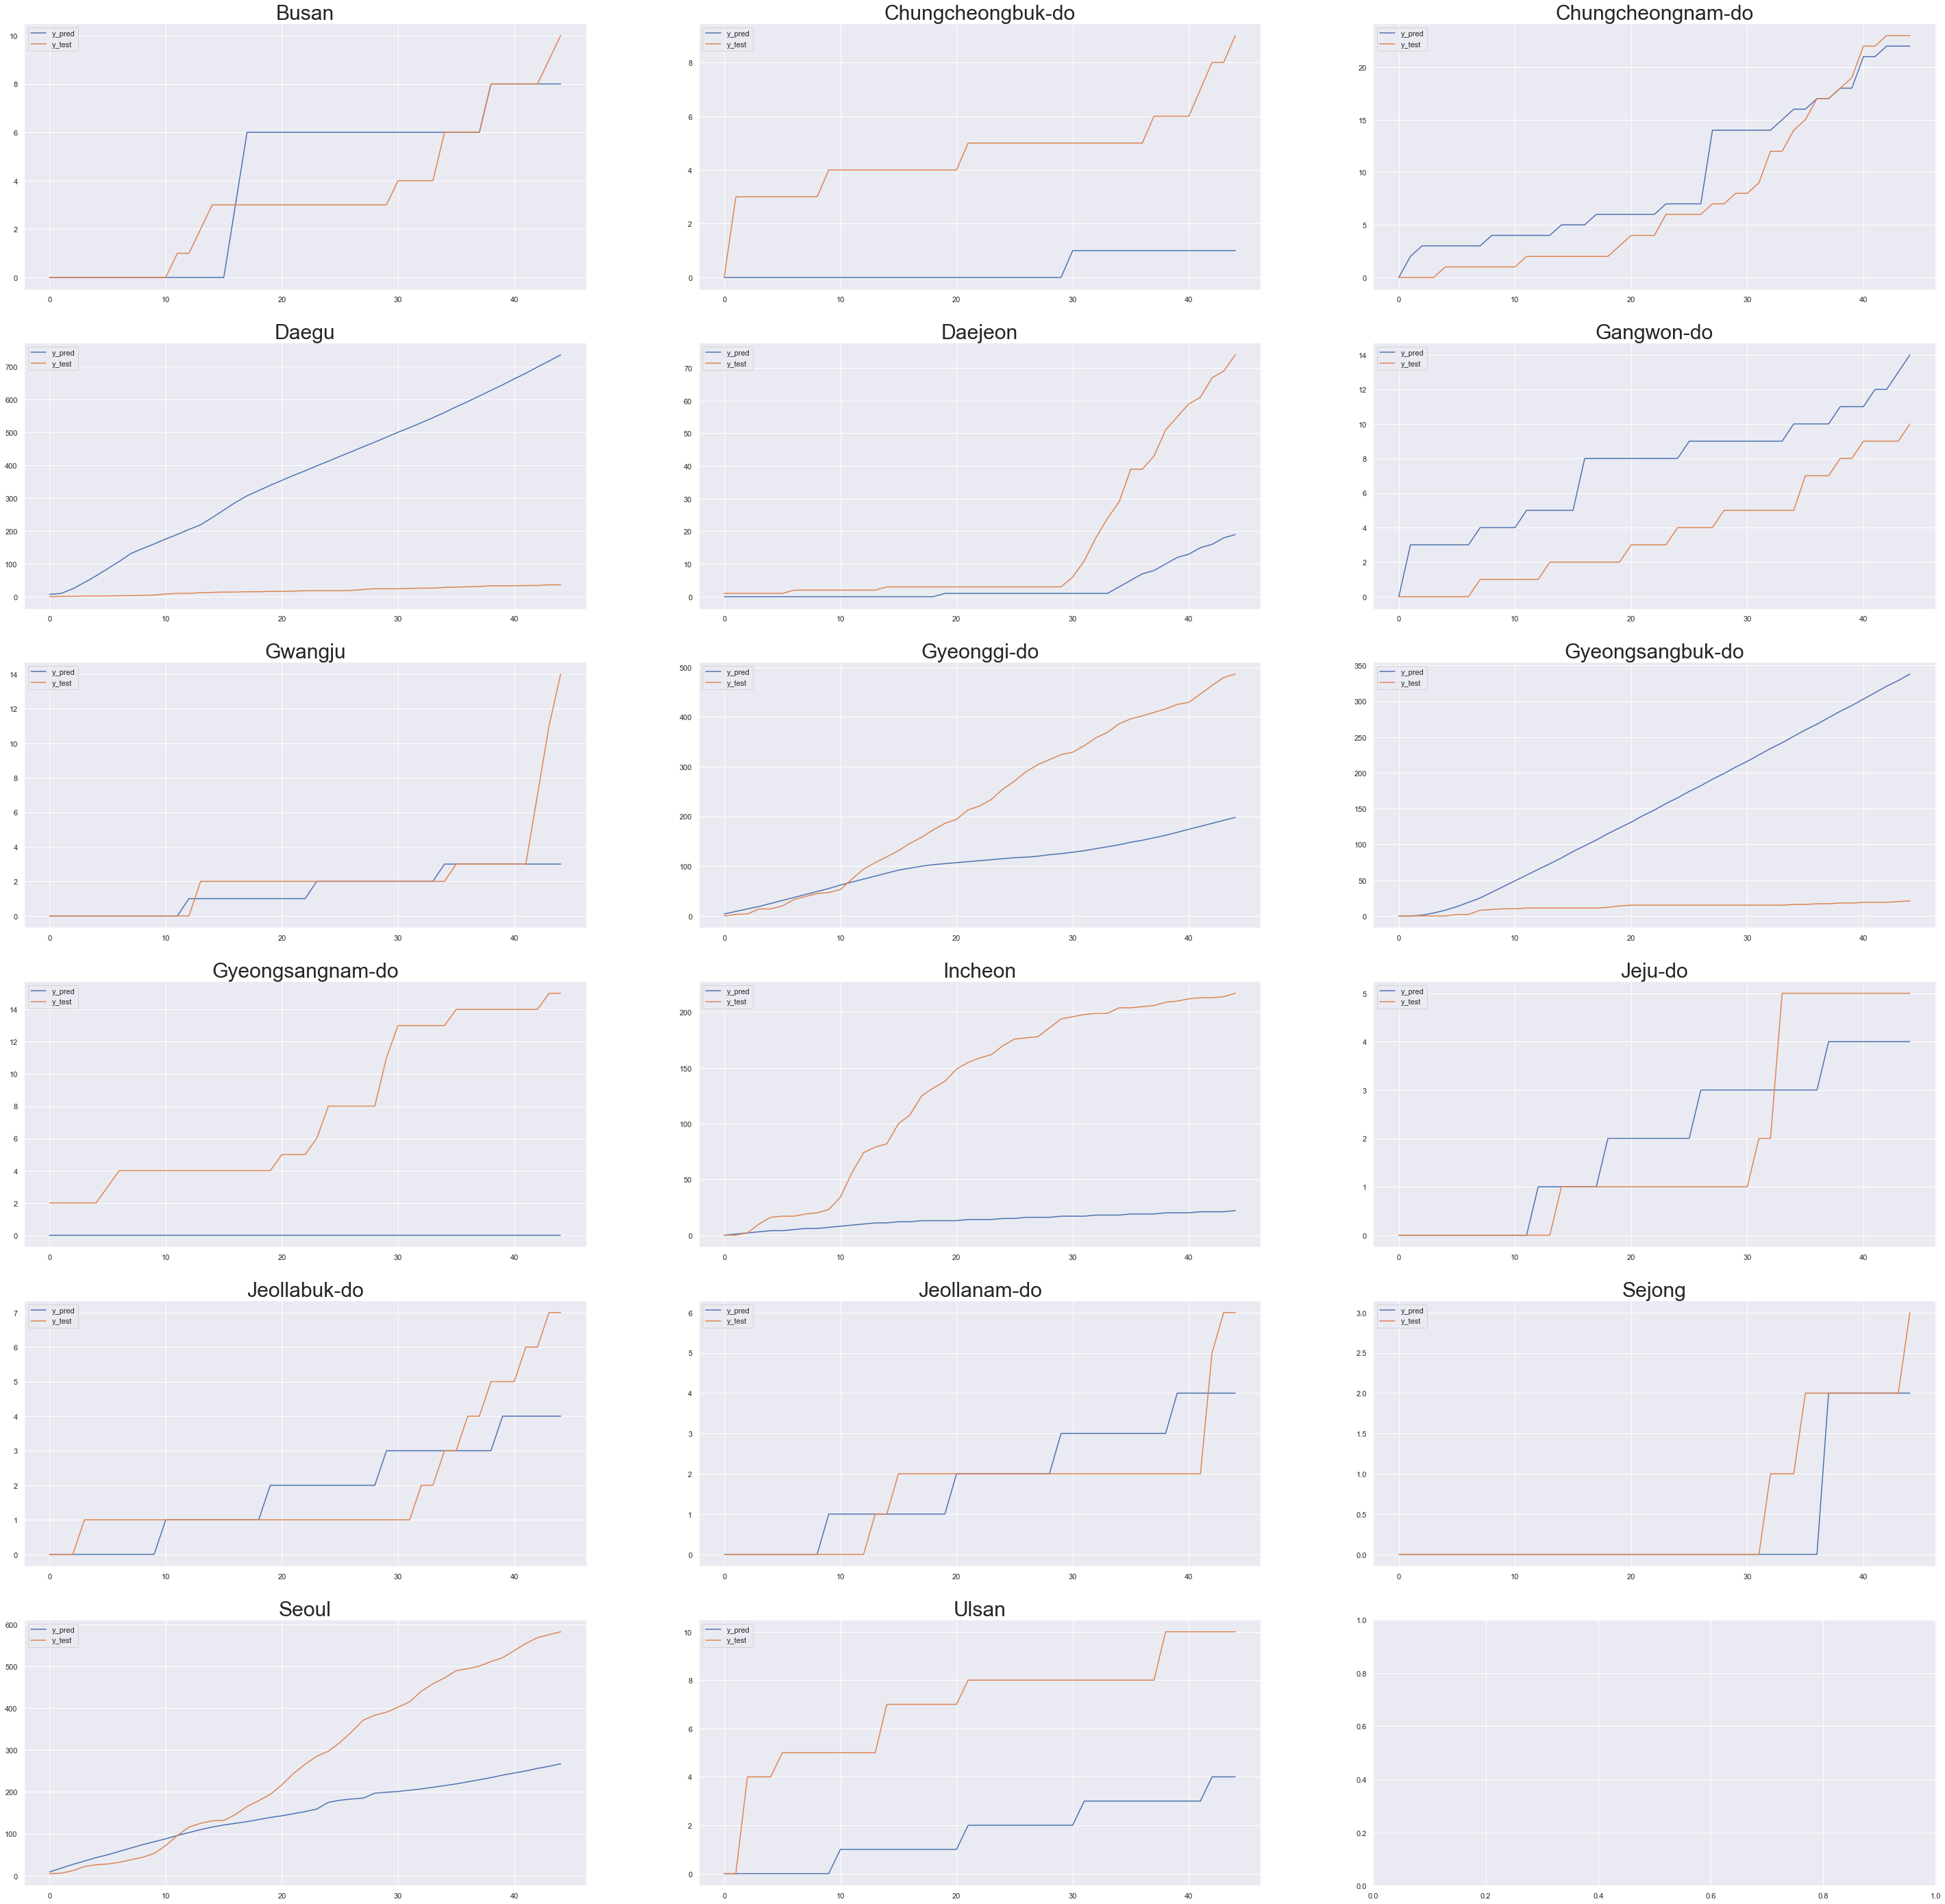

In [316]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]],label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [311]:
# 랜덤포레스트 시각화
y_dict=dict()
score=[]
for reg in regions:
    model=RandomForestRegressor(n_estimators=1000,max_depth=2)
    model.fit(X_dict[reg][:112],province_confirmed[reg][5:117])
    y_pred=model.predict(X_dict[reg][112:-5])
    y_pred=np.where(y_pred<0,0,y_pred)
    y_pred=np.trunc(y_pred.cumsum())
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,province_confirmed[reg][117:]))
    score.append(mean_squared_error(y_pred,province_confirmed[reg][117:]))
print('score_mean : ',np.mean(score))

Busan 316.4888888888889
Chungcheongbuk-do 28.466666666666665
Chungcheongnam-do 1655.9777777777779
Daegu 12592.68888888889
Daejeon 21.11111111111111
Gangwon-do 205.2888888888889
Gwangju 7.644444444444445
Gyeonggi-do 7120.466666666666
Gyeongsangbuk-do 9962.177777777777
Gyeongsangnam-do 41.6
Incheon 366.9555555555556
Jeju-do 6.222222222222222
Jeollabuk-do 10.666666666666666
Jeollanam-do 11.733333333333333
Sejong 1.4
Seoul 16625.82222222222
Ulsan 27.8
score_mean :  2882.500653594772


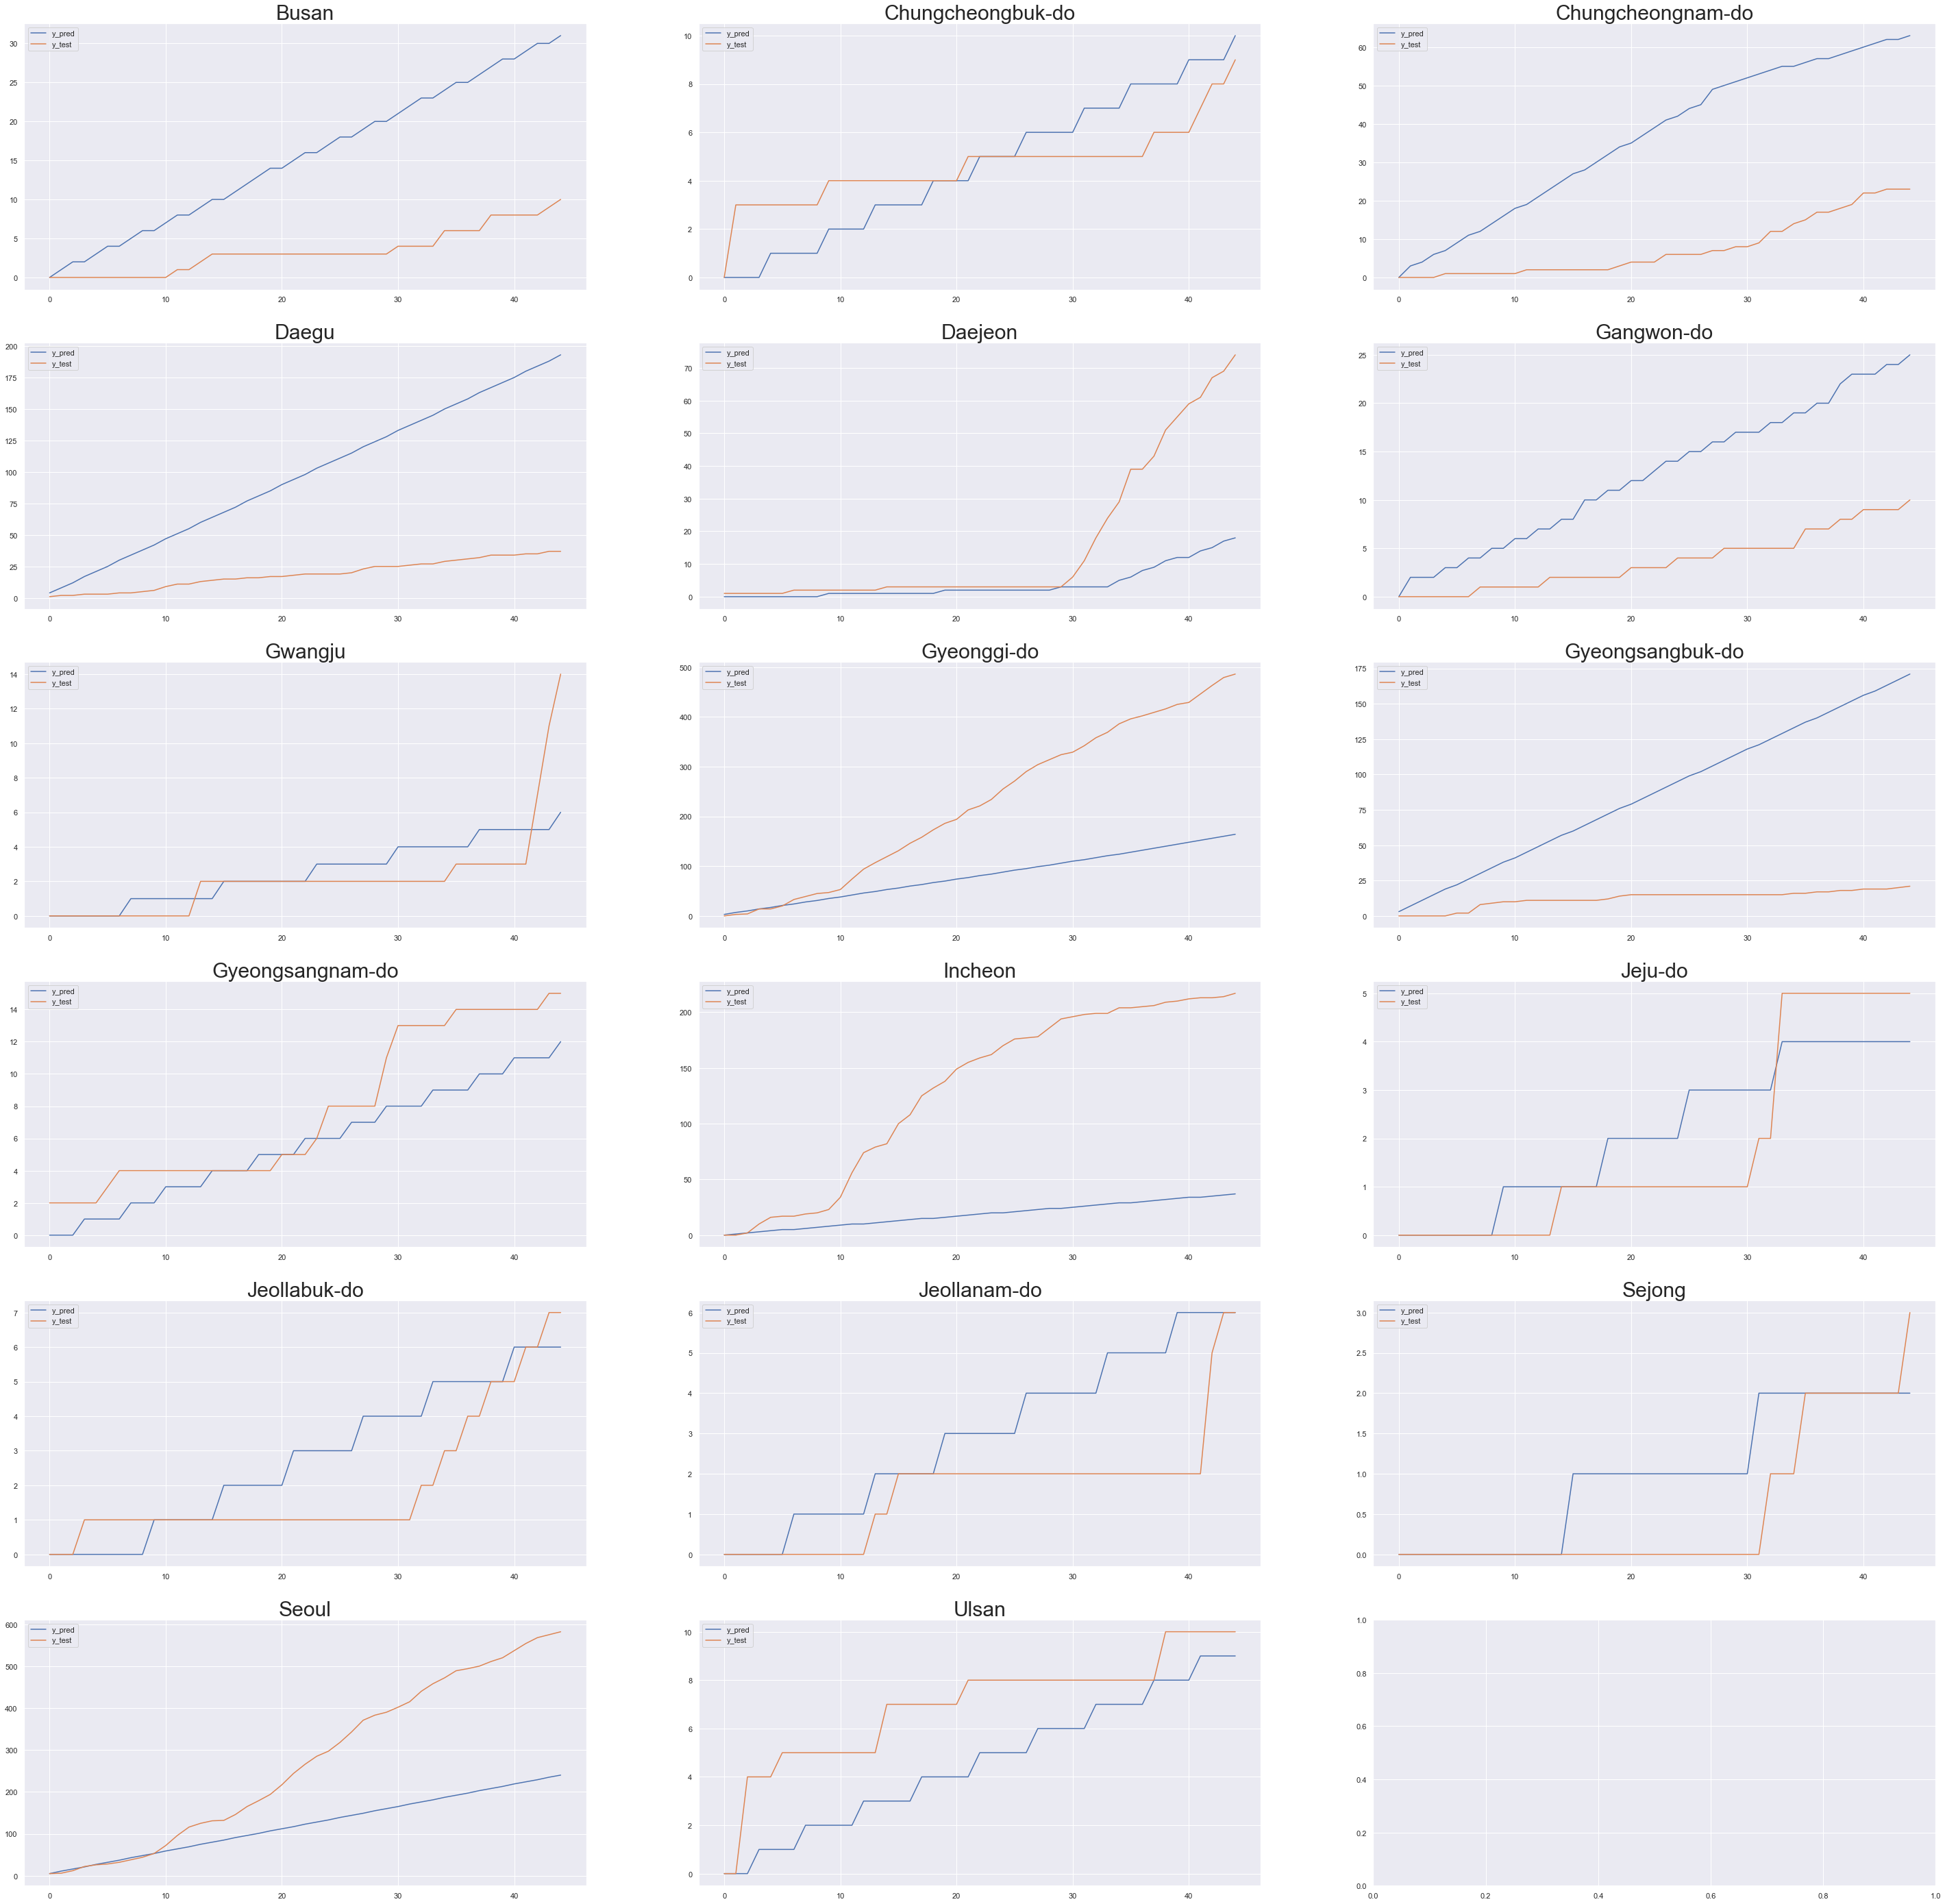

In [313]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]],label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()